 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Project Background:</b></label> 

<p style="text-align:justify"><b>Finex</b> is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis. Many customers have been complaining about unauthorised transactions being made through their credit/debit cards. It has been reported that fraudsters use stolen/lost cards and hack private systems to access the personal and sensitive data of many cardholders. They also indulge in ATM skimming at various POS terminals such as gas stations, shopping malls, and ATMs that do not send alerts or do not have OTP systems through banks. Such fraudulent activities have been reported to happen during non-peak and odd hours of the day leaving no room for suspicion.</p>


 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Project Context:</b></label> 
 
 Credit card fraud is any dishonest act or behaviour to obtain information without the proper authorisation of the account holder for financial gain. Among the different ways of committing fraud, skimming is the most common one. Skimming is a method used for duplicating information located on the magnetic stripe of the card.  Apart from this, other ways of making fraudulent transactions are as follows:

- Manipulation or alteration of genuine cards
- Creation of counterfeit cards
- Stolen or lost credit cards
- Fraudulent telemarketing
 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For Decision Tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#For Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

## Read the train

In [2]:
# Read the train 

#Train_data:
credit_train=pd.read_csv("fraudTrain.csv")
credit_train.head()



Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [3]:
credit_test = pd.read_csv("fraudTest.csv")
credit_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [4]:
# Determine the number of rows and columns in the data
print("The shape of the train dataset is",credit_train.shape)
print("The shape of the test dataset  is",credit_test.shape)

The shape of the train dataset is (1296675, 23)
The shape of the test dataset  is (555719, 23)


## Datasets Concatenation

In [5]:
credit_final=pd.concat([credit_train, credit_test], axis = 0)
credit_final.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [6]:
#The column 'Unnamed: 0' and the indices does not seem to add any value. Therefore it is good to drop them.

credit_final.drop(['Unnamed: 0'], axis=1,inplace=True)



In [7]:
#Drop the index column
credit_final.reset_index(drop=True, inplace=True)

In [8]:
# check if the operation is completed

credit_final.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   
2 -112.2620      4154        Nature conservation officer  1962-01-19   
3 -112.1138      1939                    Patent attorney  1967-01-12   
4  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [9]:
## Creating a copy of the final dataframe for operations in the future

credit_final_copy=credit_final.copy()
credit_final_copy.tail(3)

trans_date_trans_time            cc_num               merchant  \
1852391   2020-12-31 23:59:15  6011724471098086        fraud_Rau-Robel   
1852392   2020-12-31 23:59:24     4079773899158  fraud_Breitenberg LLC   
1852393   2020-12-31 23:59:34  4170689372027579      fraud_Dare-Marvin   

              category    amt   first     last gender  \
1852391      kids_pets  86.88     Ann   Lawson      F   
1852392         travel   7.99    Eric  Preston      M   
1852393  entertainment  38.13  Samuel     Frey      M   

                             street     city state    zip      lat      long  \
1852391  144 Evans Islands Apt. 683  Burbank    WA  99323  46.1966 -118.9017   
1852392  7020 Doyle Stream Apt. 951     Mesa    ID  83643  44.6255 -116.4493   
1852393    830 Myers Plaza Apt. 384   Edmond    OK  73034  35.6665  -97.4798   

         city_pop           job         dob                         trans_num  \
1852391      3684      Musician  1981-11-29  6c5b7c8add471975aa0fec023b2e8408   
1852392       129  Cartographer  1965-12-15  14392d723bb7737606b2700ac791b7aa   
1852393    116001   Media buyer  1993-05-10  1765bb45b3aa3224b4cdcb6e7a96cee3   

          unix_time  merch_lat  merch_long  is_fraud  
1852391  1388534355  46.658340 -119.715054         0  
1852392  1388534364  44.470525 -117.080888         0  
1852393  1388534374  36.210097  -97.036372         0

In [10]:
print("The shape of the final dataset for analysis and model building is {}".format(credit_final.shape))

The shape of the final dataset for analysis and model building is (1852394, 22)


<b>Summary: </b>

1. The train and test data obtained from kaggle are concatenated with credit_train on top of credit_test for further operations.
2. The shape of the combined dataset is (1852394, 22)

### **2. Data Cleaning**

In [11]:
# Check the columns in the dataframe
credit_final.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
# Dropping columns which will not add value to the model
 
credit_final.drop(['first', 'last','dob','unix_time','job','state','street'], axis=1,inplace=True)


In [13]:
# Split 'trans_date_trans_time' into trans_date and trans_time

credit_final['Transaction_date']=credit_final['trans_date_trans_time'].apply(lambda x:x.split()[0])
credit_final['Transaction_Time']=credit_final['trans_date_trans_time'].apply(lambda x:x.split()[1])


In [14]:
#Convert data type Transaction_Time and Transaction_Date to datetime format
credit_final["Transaction_Time"]= pd.to_datetime(credit_final["Transaction_Time"]).dt.time

In [15]:
credit_final["Transaction_date"]= pd.to_datetime(credit_final["Transaction_date"])

In [16]:
# The feature 'merchant' has '_fraud' in the beginning of every string. Lets get rid of it. 

credit_final['merchant']=credit_final['merchant'].apply(lambda x:x.split('_')[1])

In [17]:
# Let us check if the above code worked

credit_final.head(2)

trans_date_trans_time            cc_num                   merchant  \
0   2019-01-01 00:00:18  2703186189652095       Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322  Heller, Gutmann and Zieme   

      category     amt gender            city    zip      lat      long  \
0     misc_net    4.97      F  Moravian Falls  28654  36.0788  -81.1781   
1  grocery_pos  107.23      F          Orient  99160  48.8878 -118.2105   

   city_pop                         trans_num  merch_lat  merch_long  \
0      3495  0b242abb623afc578575680df30655b9  36.011293  -82.048315   
1       149  1f76529f8574734946361c461b024d99  49.159047 -118.186462   

   is_fraud Transaction_date Transaction_Time  
0         0       2019-01-01         00:00:18  
1         0       2019-01-01         00:00:44

In [18]:
#Drop the redundant feature since the date and time have been extracted from it.
credit_final.drop(['trans_date_trans_time'], axis=1,inplace=True)

In [19]:
# From transaction time, let's identify the hours at which the transaction happened in order to give them time ranges. 
#This derived feature will later be used to find the time range in which most fraudulent transactions happen.

credit_final['Transaction_Hour']=credit_final['Transaction_Time'].astype(str).str[:2]
credit_final.head(10)

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   
5  4767265376804500    Stroman, Hudson and Erdman  gas_transport   94.63   
6    30074693890476               Rowe-Vandervort    grocery_net   44.54   
7  6011360759745864                Corwin-Collins  gas_transport   71.65   
8  4922710831011201                    Herzog Ltd       misc_pos    4.27   
9  2720830304681674   Schoen, Kuphal and Nitzsche    grocery_pos  198.39   

  gender            city    zip      lat      long  city_pop  \
0      F  Moravian Falls  28654  36.0788  -81.1781      3495   
1      F          Orient  99160  48.8878 -118.2105       149   
2      M      Malad City  83252  42.1808 -112.2620      4154   
3      M         Boulder  59632  46.2306 -112.1138      1939   
4      M        Doe Hill  24433  38.4207  -79.4629        99   
5      F          Dublin  18917  40.3750  -75.2045      2158   
6      F         Holcomb  67851  37.9931 -100.9893      2691   
7      M        Edinburg  22824  38.8432  -78.6003      6018   
8      F           Manor  15665  40.3359  -79.6607      1472   
9      F     Clarksville  37040  36.5220  -87.3490    151785   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   
5  189a841a0a8ba03058526bcfe566aab5  40.653382  -76.152667         0   
6  83ec1cc84142af6e2acf10c44949e720  37.162705 -100.153370         0   
7  6d294ed2cc447d2c71c7171a3d54967c  38.948089  -78.540296         0   
8  fc28024ce480f8ef21a32d64c93a29f5  40.351813  -79.958146         0   
9  3b9014ea8fb80bd65de0b1463b00b00e  37.179198  -87.485381         0   

  Transaction_date Transaction_Time Transaction_Hour  
0       2019-01-01         00:00:18               00  
1       2019-01-01         00:00:44               00  
2       2019-01-01         00:00:51               00  
3       2019-01-01         00:01:16               00  
4       2019-01-01         00:03:06               00  
5       2019-01-01         00:04:08               00  
6       2019-01-01         00:04:42               00  
7       2019-01-01         00:05:08               00  
8       2019-01-01         00:05:18               00  
9       2019-01-01         00:06:01               00

In [20]:
# Lets Create a name column called Time_range to bucket the transaction hours

conditions_for_time_range=[
            
            (credit_final['Transaction_Hour'].astype(float)>=22) | (credit_final['Transaction_Hour'].astype(float)<4),
            (credit_final['Transaction_Hour'].astype(int)>=4) & (credit_final['Transaction_Hour'].astype(int)< 10),
            (credit_final['Transaction_Hour'].astype(int)>=10) & (credit_final['Transaction_Hour'].astype(int)<16),
            (credit_final['Transaction_Hour'].astype(int)>=16) & (credit_final['Transaction_Hour'].astype(int)<22)
             
          ]

values=['10 pm - 4 am','4 am - 10 am','10 am - 4 pm','4 pm - 10 pm' ]

credit_final['Trans_time_range']=np.select(conditions_for_time_range,values)

credit_final.head(10)

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   
5  4767265376804500    Stroman, Hudson and Erdman  gas_transport   94.63   
6    30074693890476               Rowe-Vandervort    grocery_net   44.54   
7  6011360759745864                Corwin-Collins  gas_transport   71.65   
8  4922710831011201                    Herzog Ltd       misc_pos    4.27   
9  2720830304681674   Schoen, Kuphal and Nitzsche    grocery_pos  198.39   

  gender            city    zip      lat      long  city_pop  \
0      F  Moravian Falls  28654  36.0788  -81.1781      3495   
1      F          Orient  99160  48.8878 -118.2105       149   
2      M      Malad City  83252  42.1808 -112.2620      4154   
3      M         Boulder  59632  46.2306 -112.1138      1939   
4      M        Doe Hill  24433  38.4207  -79.4629        99   
5      F          Dublin  18917  40.3750  -75.2045      2158   
6      F         Holcomb  67851  37.9931 -100.9893      2691   
7      M        Edinburg  22824  38.8432  -78.6003      6018   
8      F           Manor  15665  40.3359  -79.6607      1472   
9      F     Clarksville  37040  36.5220  -87.3490    151785   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   
5  189a841a0a8ba03058526bcfe566aab5  40.653382  -76.152667         0   
6  83ec1cc84142af6e2acf10c44949e720  37.162705 -100.153370         0   
7  6d294ed2cc447d2c71c7171a3d54967c  38.948089  -78.540296         0   
8  fc28024ce480f8ef21a32d64c93a29f5  40.351813  -79.958146         0   
9  3b9014ea8fb80bd65de0b1463b00b00e  37.179198  -87.485381         0   

  Transaction_date Transaction_Time Transaction_Hour Trans_time_range  
0       2019-01-01         00:00:18               00     10 pm - 4 am  
1       2019-01-01         00:00:44               00     10 pm - 4 am  
2       2019-01-01         00:00:51               00     10 pm - 4 am  
3       2019-01-01         00:01:16               00     10 pm - 4 am  
4       2019-01-01         00:03:06               00     10 pm - 4 am  
5       2019-01-01         00:04:08               00     10 pm - 4 am  
6       2019-01-01         00:04:42               00     10 pm - 4 am  
7       2019-01-01         00:05:08               00     10 pm - 4 am  
8       2019-01-01         00:05:18               00     10 pm - 4 am  
9       2019-01-01         00:06:01               00     10 pm - 4 am

In [21]:
# Lets Check the time range in which most fraudulent transactions
credit_final['Trans_time_range'].where(credit_final.is_fraud==1).value_counts()

10 pm - 4 am    8169
4 pm - 10 pm     606
10 am - 4 pm     489
4 am - 10 am     387
Name: Trans_time_range, dtype: int64

As we see Most of the Frauds are Happend at 10 pm to 4 am.<br>
<b>Bank has to be more Aleart at this time</b>

In [22]:
# Lets see in Percentages
# Lets Check the time range in which most fraudulent transactions
credit_final['Trans_time_range'].where(credit_final.is_fraud==1).value_counts(normalize=True)

10 pm - 4 am    0.846441
4 pm - 10 pm    0.062791
10 am - 4 pm    0.050668
4 am - 10 am    0.040099
Name: Trans_time_range, dtype: float64

<b>About 84% of the Frauds happend at 10 pm to 4 am</b>

In [23]:
# As the time range has been found now ,the redundant features, Transaction_Time and Transaction_Hours can be dropped.

credit_final.drop(['Transaction_Time','Transaction_Hour'],axis=1,inplace=True)


In [24]:
# Lets now Derive a feature City_Size from City's population

conditions_for_city=[
            
            (credit_final['city_pop']<5000),
            (credit_final['city_pop']>=5000) & (credit_final['city_pop']< 200000),
            (credit_final['city_pop']>=200000) & (credit_final['city_pop']< 1000000),
            (credit_final['city_pop']>=1000000) & (credit_final['city_pop']<1500000),
            (credit_final['city_pop']>=1500000)   
          ]

values_city=['Very Small','Small','Medium','Large','Very Large' ]

credit_final['City_Size']=np.select(conditions_for_city,values_city)

credit_final.head(10)

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   
5  4767265376804500    Stroman, Hudson and Erdman  gas_transport   94.63   
6    30074693890476               Rowe-Vandervort    grocery_net   44.54   
7  6011360759745864                Corwin-Collins  gas_transport   71.65   
8  4922710831011201                    Herzog Ltd       misc_pos    4.27   
9  2720830304681674   Schoen, Kuphal and Nitzsche    grocery_pos  198.39   

  gender            city    zip      lat      long  city_pop  \
0      F  Moravian Falls  28654  36.0788  -81.1781      3495   
1      F          Orient  99160  48.8878 -118.2105       149   
2      M      Malad City  83252  42.1808 -112.2620      4154   
3      M         Boulder  59632  46.2306 -112.1138      1939   
4      M        Doe Hill  24433  38.4207  -79.4629        99   
5      F          Dublin  18917  40.3750  -75.2045      2158   
6      F         Holcomb  67851  37.9931 -100.9893      2691   
7      M        Edinburg  22824  38.8432  -78.6003      6018   
8      F           Manor  15665  40.3359  -79.6607      1472   
9      F     Clarksville  37040  36.5220  -87.3490    151785   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   
5  189a841a0a8ba03058526bcfe566aab5  40.653382  -76.152667         0   
6  83ec1cc84142af6e2acf10c44949e720  37.162705 -100.153370         0   
7  6d294ed2cc447d2c71c7171a3d54967c  38.948089  -78.540296         0   
8  fc28024ce480f8ef21a32d64c93a29f5  40.351813  -79.958146         0   
9  3b9014ea8fb80bd65de0b1463b00b00e  37.179198  -87.485381         0   

  Transaction_date Trans_time_range   City_Size  
0       2019-01-01     10 pm - 4 am  Very Small  
1       2019-01-01     10 pm - 4 am  Very Small  
2       2019-01-01     10 pm - 4 am  Very Small  
3       2019-01-01     10 pm - 4 am  Very Small  
4       2019-01-01     10 pm - 4 am  Very Small  
5       2019-01-01     10 pm - 4 am  Very Small  
6       2019-01-01     10 pm - 4 am  Very Small  
7       2019-01-01     10 pm - 4 am       Small  
8       2019-01-01     10 pm - 4 am  Very Small  
9       2019-01-01     10 pm - 4 am       Small

In [25]:
# Checking whether city_size relates to fraudulent transaction frequency

filter1=credit_final['city']=='Philadelphia'
filter2=credit_final['is_fraud']==1

credit_final['City_Size'].where(filter1 & filter2).value_counts()

Very Large    6
Name: City_Size, dtype: int64

There does not seem to be much relation between city_size and frequency of fraudulent transactions.<br> Therefore this derived feature may be dropped.

In [26]:
# Lets see Frauds with column gender
credit_final['gender'].where(credit_final.is_fraud==1).value_counts(normalize=True)

F    0.507616
M    0.492384
Name: gender, dtype: float64

In [27]:
credit_final['gender'].where(credit_final.is_fraud==1).value_counts()

F    4899
M    4752
Name: gender, dtype: int64

Fraud Counts for <b>Females are 4899 </b><br>
Fraud Counts for <b>Males are 4758</b><br> 

In [28]:
## Now Lets Create a column from credit_final['city'], city_risk, on the basis of number of frauds happened.

x=pd.DataFrame(credit_final.groupby(credit_final['city'])['is_fraud'].sum())
x.columns = ['Fraud_Count']
x.reset_index(inplace=True)
credit_final['City_Frauds'] = credit_final['city'].map(x.set_index('city')['Fraud_Count'])
credit_final.head()


cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   

  gender            city    zip      lat      long  city_pop  \
0      F  Moravian Falls  28654  36.0788  -81.1781      3495   
1      F          Orient  99160  48.8878 -118.2105       149   
2      M      Malad City  83252  42.1808 -112.2620      4154   
3      M         Boulder  59632  46.2306 -112.1138      1939   
4      M        Doe Hill  24433  38.4207  -79.4629        99   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   

  Transaction_date Trans_time_range   City_Size  City_Frauds  
0       2019-01-01     10 pm - 4 am  Very Small           11  
1       2019-01-01     10 pm - 4 am  Very Small           11  
2       2019-01-01     10 pm - 4 am  Very Small            8  
3       2019-01-01     10 pm - 4 am  Very Small           15  
4       2019-01-01     10 pm - 4 am  Very Small           13

In [29]:
# Checking if the above code worked

conditions_city_fraud=[
            
            (credit_final['City_Frauds']<10),
            (credit_final['City_Frauds']>=10) & (credit_final['City_Frauds']< 20),
            (credit_final['city_pop']>=20)
          ]

values_city_fraud=['Low','Medium','High']

credit_final['City_Fraud_Risk']=np.select(conditions_city_fraud,values_city_fraud)
credit_final.head(3)

cc_num                   merchant       category     amt gender  \
0  2703186189652095       Rippin, Kub and Mann       misc_net    4.97      F   
1      630423337322  Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2    38859492057661             Lind-Buckridge  entertainment  220.11      M   

             city    zip      lat      long  city_pop  \
0  Moravian Falls  28654  36.0788  -81.1781      3495   
1          Orient  99160  48.8878 -118.2105       149   
2      Malad City  83252  42.1808 -112.2620      4154   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   

  Transaction_date Trans_time_range   City_Size  City_Frauds City_Fraud_Risk  
0       2019-01-01     10 pm - 4 am  Very Small           11          Medium  
1       2019-01-01     10 pm - 4 am  Very Small           11          Medium  
2       2019-01-01     10 pm - 4 am  Very Small            8             Low

In [30]:
## Creating a column from credit_final['merchant'], merchant_risk, on the basis of number of frauds happened.


y=pd.DataFrame(credit_final.groupby(credit_final['merchant'])['is_fraud'].sum())
y.columns = ['Fraud_Count_Merchant']
y.reset_index(inplace=True)
credit_final['Merchant_Frauds'] = credit_final['merchant'].map(y.set_index('merchant')['Fraud_Count_Merchant'])
credit_final[['Merchant_Frauds']].describe([0.25,0.40,0.50,0.75,0.90,0.95,0.99,0.999]).apply(lambda x:x.apply('{0:.2f}'.format))
credit_final.head(5)


cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   

  gender            city    zip      lat      long  city_pop  \
0      F  Moravian Falls  28654  36.0788  -81.1781      3495   
1      F          Orient  99160  48.8878 -118.2105       149   
2      M      Malad City  83252  42.1808 -112.2620      4154   
3      M         Boulder  59632  46.2306 -112.1138      1939   
4      M        Doe Hill  24433  38.4207  -79.4629        99   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   

  Transaction_date Trans_time_range   City_Size  City_Frauds City_Fraud_Risk  \
0       2019-01-01     10 pm - 4 am  Very Small           11          Medium   
1       2019-01-01     10 pm - 4 am  Very Small           11          Medium   
2       2019-01-01     10 pm - 4 am  Very Small            8             Low   
3       2019-01-01     10 pm - 4 am  Very Small           15          Medium   
4       2019-01-01     10 pm - 4 am  Very Small           13          Medium   

   Merchant_Frauds  
0               24  
1               35  
2                5  
3                9  
4                7

In [31]:
conditions_for_merchant_fraud=[
            
            (credit_final['Merchant_Frauds']<10),
            (credit_final['Merchant_Frauds']>=10) & (credit_final['Merchant_Frauds']< 20),
            (credit_final['Merchant_Frauds']>=20) & (credit_final['Merchant_Frauds']< 40),
            (credit_final['Merchant_Frauds']>=40)
          ]

values_merchant_fraud=['Low','Medium','High','Very High']

credit_final['Merchant_Fraud_Risk']=np.select(conditions_for_merchant_fraud,values_merchant_fraud)
credit_final.head(10)

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   
5  4767265376804500    Stroman, Hudson and Erdman  gas_transport   94.63   
6    30074693890476               Rowe-Vandervort    grocery_net   44.54   
7  6011360759745864                Corwin-Collins  gas_transport   71.65   
8  4922710831011201                    Herzog Ltd       misc_pos    4.27   
9  2720830304681674   Schoen, Kuphal and Nitzsche    grocery_pos  198.39   

  gender            city    zip      lat      long  city_pop  \
0      F  Moravian Falls  28654  36.0788  -81.1781      3495   
1      F          Orient  99160  48.8878 -118.2105       149   
2      M      Malad City  83252  42.1808 -112.2620      4154   
3      M         Boulder  59632  46.2306 -112.1138      1939   
4      M        Doe Hill  24433  38.4207  -79.4629        99   
5      F          Dublin  18917  40.3750  -75.2045      2158   
6      F         Holcomb  67851  37.9931 -100.9893      2691   
7      M        Edinburg  22824  38.8432  -78.6003      6018   
8      F           Manor  15665  40.3359  -79.6607      1472   
9      F     Clarksville  37040  36.5220  -87.3490    151785   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   
5  189a841a0a8ba03058526bcfe566aab5  40.653382  -76.152667         0   
6  83ec1cc84142af6e2acf10c44949e720  37.162705 -100.153370         0   
7  6d294ed2cc447d2c71c7171a3d54967c  38.948089  -78.540296         0   
8  fc28024ce480f8ef21a32d64c93a29f5  40.351813  -79.958146         0   
9  3b9014ea8fb80bd65de0b1463b00b00e  37.179198  -87.485381         0   

  Transaction_date Trans_time_range   City_Size  City_Frauds City_Fraud_Risk  \
0       2019-01-01     10 pm - 4 am  Very Small           11          Medium   
1       2019-01-01     10 pm - 4 am  Very Small           11          Medium   
2       2019-01-01     10 pm - 4 am  Very Small            8             Low   
3       2019-01-01     10 pm - 4 am  Very Small           15          Medium   
4       2019-01-01     10 pm - 4 am  Very Small           13          Medium   
5       2019-01-01     10 pm - 4 am  Very Small            7             Low   
6       2019-01-01     10 pm - 4 am  Very Small           16          Medium   
7       2019-01-01     10 pm - 4 am       Small            7             Low   
8       2019-01-01     10 pm - 4 am  Very Small           12          Medium   
9       2019-01-01     10 pm - 4 am       Small           14          Medium   

   Merchant_Frauds Merchant_Fraud_Risk  
0               24                High  
1               35                High  
2                5                 Low  
3                9                 Low  
4                7                 Low  
5               15              Medium  
6                3                 Low  
7               15              Medium  
8                4                 Low  
9               40           Very High

In [32]:
# Lets drop some of the redundant features

credit_final.drop(['City_Frauds','Merchant_Frauds','City_Size','city'], axis=1,inplace=True)

In [33]:
# Change the values in cc_num to ascertain its validity. Genrally the range of credit card numbers is 8-19 digits.

credit_final['cc_len']=credit_final['cc_num'].astype(str).map(len)

In [35]:
print("Minimum value of cc_num is {}".format(credit_final['cc_len'].min()))
print("Maximum value of cc_num is {}".format(credit_final['cc_len'].max()))

Minimum value of cc_num is 11
Maximum value of cc_num is 19


Since the numbers of credit cards lie between the length 8 and 19, they are valid.



In [36]:
credit_final.drop(['cc_len'], axis=1,inplace=True)

In [37]:
# Lets Inspect Data Types 

credit_final.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   cc_num               int64         
 1   merchant             object        
 2   category             object        
 3   amt                  float64       
 4   gender               object        
 5   zip                  int64         
 6   lat                  float64       
 7   long                 float64       
 8   city_pop             int64         
 9   trans_num            object        
 10  merch_lat            float64       
 11  merch_long           float64       
 12  is_fraud             int64         
 13  Transaction_date     datetime64[ns]
 14  Trans_time_range     object        
 15  City_Fraud_Risk      object        
 16  Merchant_Fraud_Risk  object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(7)
memory usage: 240.3+ MB


In [38]:
# Missing Values Inspection

credit_final.isnull().sum()

cc_num                 0
merchant               0
category               0
amt                    0
gender                 0
zip                    0
lat                    0
long                   0
city_pop               0
trans_num              0
merch_lat              0
merch_long             0
is_fraud               0
Transaction_date       0
Trans_time_range       0
City_Fraud_Risk        0
Merchant_Fraud_Risk    0
dtype: int64


There are no missing values in the data set

In [39]:
# Lets describe the data in Quartiles
credit_final.describe([0.25,0.40,0.50,0.75,0.90,0.95,0.99,0.999]).apply(lambda x:x.apply('{0:.2f}'.format))

cc_num         amt         zip         lat        long  \
count              1852394.00  1852394.00  1852394.00  1852394.00  1852394.00   
mean    417386038394006464.00       70.06    48813.26       38.54      -90.23   
std    1309115265318020352.00      159.25    26881.85        5.07       13.75   
min            60416207185.00        1.00     1257.00       20.03     -165.67   
25%        180042946491150.00        9.64    26237.00       34.67      -96.80   
40%        377654590313960.00       32.08    38922.00       38.24      -91.03   
50%       3521417320836166.00       47.45    48174.00       39.35      -87.48   
75%       4642255475285942.00       83.10    72042.00       41.94      -80.16   
90%       6573561108825071.00      136.33    85020.00       44.45      -74.98   
95%    4497913965512794112.00      195.34    94569.00       45.84      -73.54   
99%    4890424426862857216.00      537.90    98304.00       48.48      -70.35   
99.9%  4992346398065154048.00     1517.24    99783.00       64.76      -67.95   
max    4992346398065154048.00    28948.90    99921.00       66.69      -67.95   

         city_pop   merch_lat  merch_long    is_fraud  
count  1852394.00  1852394.00  1852394.00  1852394.00  
mean     88643.67       38.54      -90.23        0.01  
std     301487.62        5.11       13.76        0.07  
min         23.00       19.03     -166.67        0.00  
25%        741.00       34.74      -96.90        0.00  
40%       1628.00       38.06      -91.09        0.00  
50%       2443.00       39.37      -87.44        0.00  
75%      20328.00       41.96      -80.25        0.00  
90%     186140.00       44.49      -74.94        0.00  
95%     525713.00       46.00      -73.37        0.00  
99%    1577385.00       48.58      -70.40        0.00  
99.9%  2906700.00       64.75      -68.01        1.00  
max    2906700.00       67.51      -66.95        1.00

<b>The statistical summary suggests the presence of outliers. </b>

In [40]:
# Let's have a look at the cleaned dataset

credit_final.head()

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   

  gender    zip      lat      long  city_pop  \
0      F  28654  36.0788  -81.1781      3495   
1      F  99160  48.8878 -118.2105       149   
2      M  83252  42.1808 -112.2620      4154   
3      M  59632  46.2306 -112.1138      1939   
4      M  24433  38.4207  -79.4629        99   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   

  Transaction_date Trans_time_range City_Fraud_Risk Merchant_Fraud_Risk  
0       2019-01-01     10 pm - 4 am          Medium                High  
1       2019-01-01     10 pm - 4 am          Medium                High  
2       2019-01-01     10 pm - 4 am             Low                 Low  
3       2019-01-01     10 pm - 4 am          Medium                 Low  
4       2019-01-01     10 pm - 4 am          Medium                 Low

<b>Summary: </b>
1. There are no missing values in the dataset
2. All the columns which did not add value to the analysis and modelling were dropped
3. The trans_date_trans_time column was split into two to get transaction date and transaction time separately for analysis.

4. Derived columns:

- City Size: Derived from city population to categorize cities by the size of their population

- Transaction_time_range: To understand the range of time during which transactions happen. 

- City_Fraud_Risk: To understand the risk level of cities on the basis of the number of fraudulent transactions

- Merchant_Fraud_Risk: To understand the risk level in making transactions with different merchants on the basis of the number of fraudulent transactions

- Transaction_date: To derive historical features wherever necessary

<b>Conclusion</b>: The data has been cleaned and is ready for analysis

## **3. Exploratory Data Analysis**

In [41]:
# Lets  Check Data Imbalance

print(credit_final['is_fraud'].value_counts()/len(credit_final)*100)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64


<b> The dataset is highly imbalanced with just 0.52% fraudulent transactions.</b>

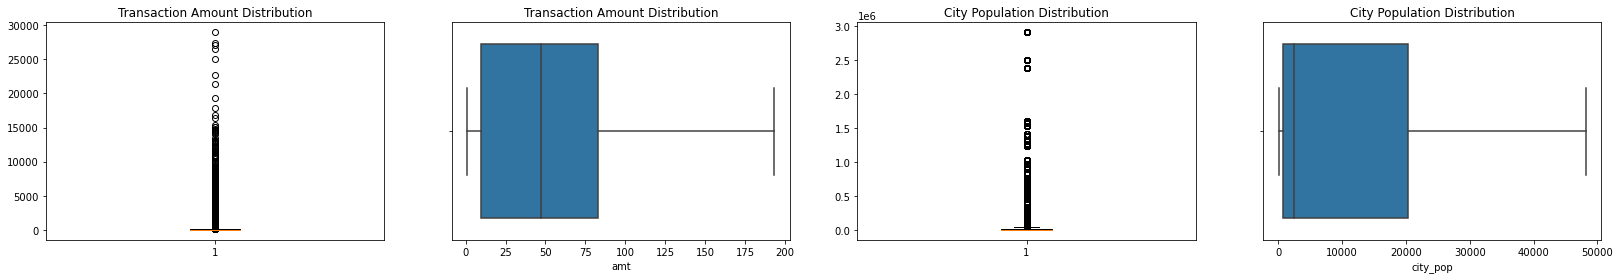

In [42]:
# Lets Identify Outliers with BoxPlots

plt.subplot(141)
plt.boxplot(credit_final['amt'])
plt.title("Transaction Amount Distribution")

plt.subplots_adjust(left=0.4,right=4)


plt.subplot(142)
sns.boxplot(credit_final['amt'],showfliers=False)
# plt.yscale('log')
plt.title("Transaction Amount Distribution")

plt.subplot(143)
plt.boxplot(credit_final['city_pop'])
plt.title("City Population Distribution")


plt.subplot(144)
sns.boxplot(credit_final['city_pop'],showfliers=False)
# plt.yscale('log')
plt.title("City Population Distribution")


plt.show()

The plots of transaction amount and City Population suggest large number of outliers in both the features.<br> These will be treated using the appropriate methods below

**Outlier Treatment**

In [43]:
# 1. credit_final['amt]
## Method used: Capping using IQR method

#Step 1: Defining upper and lower bounds

q1=credit_final['amt'].quantile(0.25)
q3=credit_final['amt'].quantile(0.999)
print("The first Quantile,Q1 of the amount feature is",q1)
print("The third Quantile,Q3 of the amount feature is",q3)

iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print("IQR Is",iqr)

print("Upper Bound:",upper_bound)
print("Lower Bound:",lower_bound)


#Step 2. Capping the outliers
credit_final.loc[(credit_final['amt']>upper_bound),'amt']=upper_bound


The first Quantile,Q1 of the amount feature is 9.64
The third Quantile,Q3 of the amount feature is 1517.2410500000465
IQR Is 1507.6010500000464
Upper Bound: 3778.642625000116
Lower Bound: -2251.7615750000696


In [44]:
# 2. City Population
## Method used: Binning

#Step 1: Defining upper and lower bounds

q1=credit_final['city_pop'].quantile(0.25)
q3=credit_final['city_pop'].quantile(0.999)
print("The first quantile,Q1, of the city population feature is",q1)
print("The third quantile,Q3, of the city population feature is",q3)

# Inspecting the records which are flagged as fraud 

pop_outliers=credit_final[(credit_final['city_pop']>q3)]
pop_outliers_fraud=pop_outliers.loc[pop_outliers['is_fraud']==1]
pop_outliers_fraud.sort_values(by='city_pop',ascending=False).count()

The first quantile,Q1, of the city population feature is 741.0
The third quantile,Q3, of the city population feature is 2906700.0


cc_num                 0
merchant               0
category               0
amt                    0
gender                 0
zip                    0
lat                    0
long                   0
city_pop               0
trans_num              0
merch_lat              0
merch_long             0
is_fraud               0
Transaction_date       0
Trans_time_range       0
City_Fraud_Risk        0
Merchant_Fraud_Risk    0
dtype: int64

As large as 2344 fraudulent transactions have happened even at the 99th percentile. Capping or deleting records will make us lose data. Hence, going ahead with binning.


In [45]:
values_merchant_fraud=['Low','Medium','High','Very High']

In [46]:
#Step 2. Binning

credit_final['City_Pop_Bins']=pd.cut(credit_train['city_pop'],[-1,741,2443,186140,525713,2906700],labels=['Very Low','Low','Medium','High','Very High'])
round(credit_final['City_Pop_Bins'].value_counts(normalize=True)*100,2)

Medium       40.15
Very Low     24.98
Low          24.97
High          4.99
Very High     4.91
Name: City_Pop_Bins, dtype: float64

In [47]:
# Now a new column indicating the population of cities is created, city_pop can be dropped. 

credit_final.drop('city_pop',axis=1,inplace=True)

In [48]:
# Lets Test for Skewness
credit_final.skew()

cc_num         2.851074
amt           11.635161
zip            0.078950
lat           -0.191999
long          -1.146919
merch_lat     -0.188097
merch_long    -1.143933
is_fraud      13.745675
dtype: float64

## **3.1 Univariate Analysis**




In [49]:
# Find the unique values in each feature
print("Conclusion:")
print("The unique values in credit card numbers are {}".format(credit_final['cc_num'].nunique()))
print("The unique merchants are {}".format(credit_final['merchant'].nunique()))
print("The unique values in categories are {}".format(credit_final['category'].nunique()))




Conclusion:
The unique values in credit card numbers are 999
The unique merchants are 693
The unique values in categories are 14


Such large number of unique values will be difficult to deal with during model building process.<br> Therefore it is essential to label them into appropriate categories for ease of model building.

The unique values of credit card numbers is only <b>999</b> in a dataset with over <b>180,0000</b> rows which cleearly indicates multiple transactions made by the same customer at various merchants in <b>14</b> categories of shopping

In [50]:
numerical_vars=['amt','lat','long','merch_lat','merch_long']

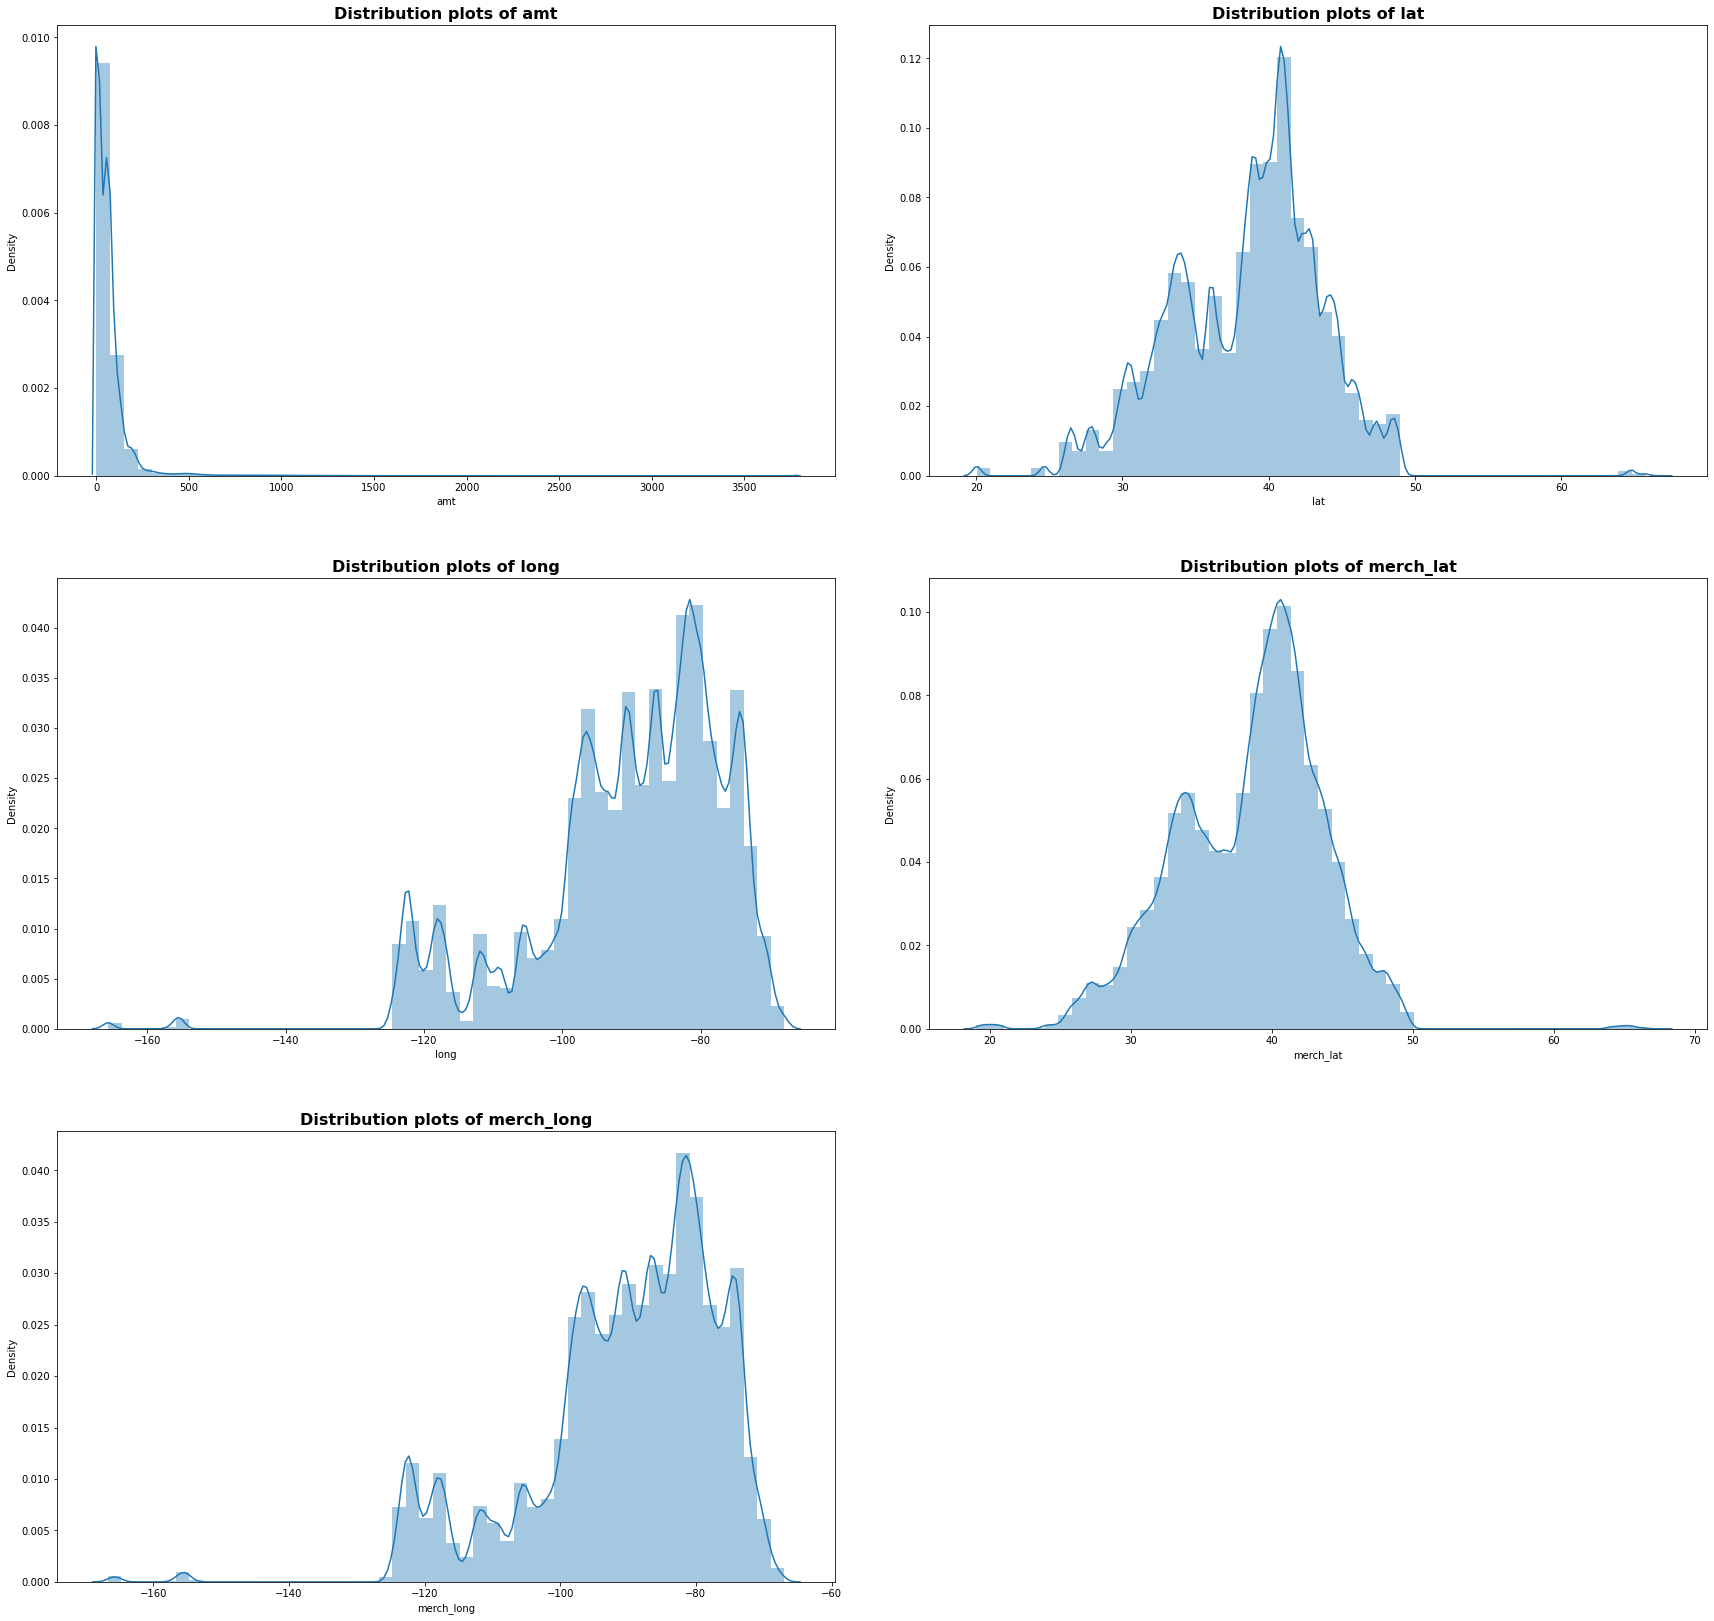

In [51]:

plt.figure(figsize = (25,30))
for var in enumerate(numerical_vars):
    plt.subplot(4,2,var[0]+1)
    plt.title("Distribution plots of " + var[1], fontweight = 'bold', fontsize = 16)
    sns.distplot(credit_final[var[1]])
    
    plt.tight_layout(pad=5.0)
    plt.subplots_adjust(top=1.0)

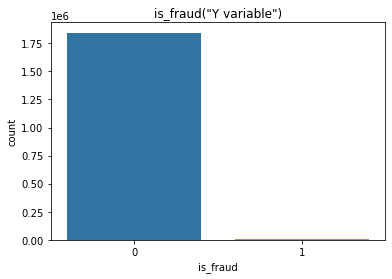

In [52]:
# Target Variable

sns.countplot(credit_final['is_fraud'])
plt.title('is_fraud("Y variable")')
plt.show()

## **3.2 Bivariate Analysis**

<AxesSubplot:xlabel='Trans_time_range'>

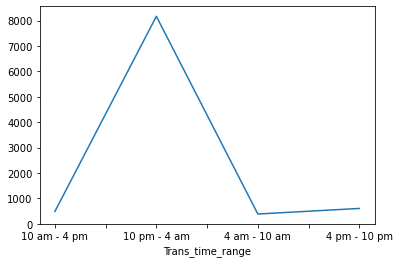

In [53]:
#Inspect the transaction timing when fraudulent transactions occur
#When is_fraud=1 vs transaction_time

#This dataframe only has frauds
df_fraud = credit_final[credit_final.is_fraud == 1]


df_fraud.groupby('Trans_time_range').agg('is_fraud').count().plot( x='Trans_time_range', y='is_fraud')


 The plot between the transaction time and number of fraudulent transactions suggest that the highest number of frauds happened between <b>10 pm to around 4:00 pm.</b><br> This is when the bank has to be most alert. 

<AxesSubplot:xlabel='gender'>

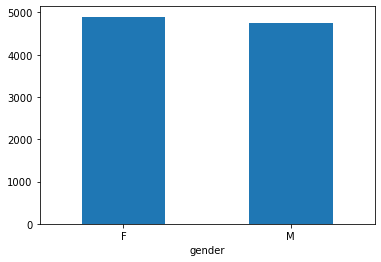

In [54]:
df_fraud.groupby('gender').agg('is_fraud').count().plot.bar(x='gender', y='vais_fraudl', rot=0)


In [55]:
# Lets drop some of the redundant feature 'gender'
credit_final.drop(['gender'],axis=1,inplace=True)

<AxesSubplot:xlabel='category'>

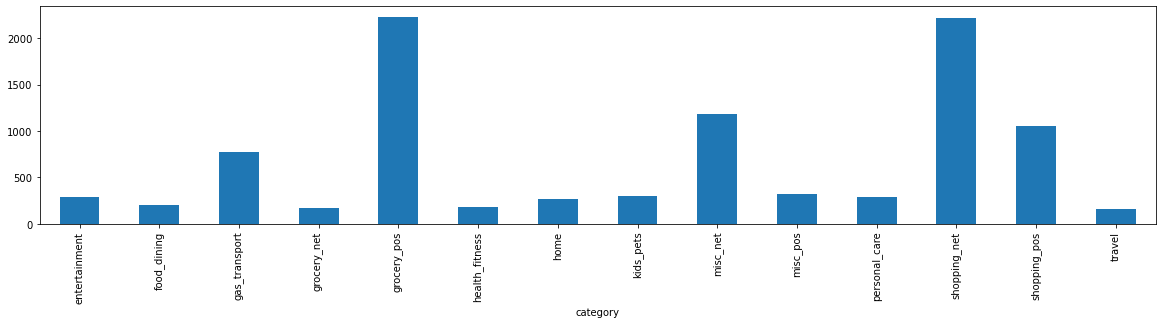

In [56]:
# Category vs is_fraud

plt.figure(figsize=(20,4))
df_fraud.groupby('category').agg('is_fraud').count().plot(kind='bar',x='merchant', y='is_fraud')


The bar chart above suggests there are highest number of fraudulent transactions happening at grocery Point of Sale followed by internet shopping.

In [57]:
# Find the merchants with highest frequency of fraud

risk_merchant=df_fraud.merchant.value_counts()
print("A high number of fraudulent transactions have happened at the following merchants:","\n",risk_merchant.head(10))
print("The least number of fraudulent transactions have happened in the following merchants:","\n",risk_merchant.tail(5))

A high number of fraudulent transactions have happened at the following merchants: 
 Kilback LLC       62
Kozey-Boehm       60
Rau and Sons      60
Doyle Ltd         57
Terry-Huel        56
Kuhn LLC          55
Boyer PLC         55
Cormier LLC       53
Kiehn-Emmerich    53
Kuhic LLC         53
Name: merchant, dtype: int64
The least number of fraudulent transactions have happened in the following merchants: 
 Prosacco, Kreiger and Kovacek    1
Kub-Heaney                       1
Dietrich-Fadel                   1
Romaguera and Sons               1
Kohler, Lindgren and Koelpin     1
Name: merchant, dtype: int64


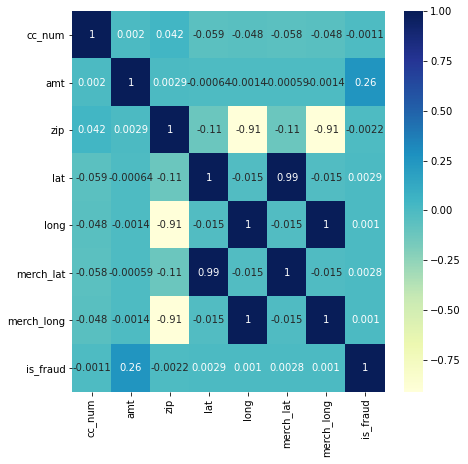

In [58]:
# Let's see the correlation matrix 
plt.figure(figsize = (7,7))        # Size of the figure
sns.heatmap(credit_final.corr(),annot = True,cmap="YlGnBu")

plt.show()

## **4. Data Preparation**

In [59]:
# Lets have the dataframe here to get a view of it

credit_final.head(2)

cc_num                   merchant     category     amt    zip  \
0  2703186189652095       Rippin, Kub and Mann     misc_net    4.97  28654   
1      630423337322  Heller, Gutmann and Zieme  grocery_pos  107.23  99160   

       lat      long                         trans_num  merch_lat  merch_long  \
0  36.0788  -81.1781  0b242abb623afc578575680df30655b9  36.011293  -82.048315   
1  48.8878 -118.2105  1f76529f8574734946361c461b024d99  49.159047 -118.186462   

   is_fraud Transaction_date Trans_time_range City_Fraud_Risk  \
0         0       2019-01-01     10 pm - 4 am          Medium   
1         0       2019-01-01     10 pm - 4 am          Medium   

  Merchant_Fraud_Risk City_Pop_Bins  
0                High        Medium  
1                High      Very Low

In [60]:
credit_final.shape

(1852394, 16)

In [61]:
# Create Dummy variables

dummy1 = pd.get_dummies(credit_final[['category','Trans_time_range','City_Fraud_Risk','Merchant_Fraud_Risk','City_Pop_Bins']], drop_first=True)
dummy1.head()

category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  1                     0                   0   
4                  0                     0                   0   

   City_Pop_Bins_Very High  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [62]:
# Lets see the Shape of Dummy
dummy1.shape

(1852394, 25)

In [64]:
# Adding the results to the master dataframe
credit_final = pd.concat([credit_final, dummy1], axis=1)

In [65]:
credit_final.head(3)

cc_num                   merchant       category     amt    zip  \
0  2703186189652095       Rippin, Kub and Mann       misc_net    4.97  28654   
1      630423337322  Heller, Gutmann and Zieme    grocery_pos  107.23  99160   
2    38859492057661             Lind-Buckridge  entertainment  220.11  83252   

       lat      long                         trans_num  merch_lat  merch_long  \
0  36.0788  -81.1781  0b242abb623afc578575680df30655b9  36.011293  -82.048315   
1  48.8878 -118.2105  1f76529f8574734946361c461b024d99  49.159047 -118.186462   
2  42.1808 -112.2620  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481   

   is_fraud Transaction_date Trans_time_range City_Fraud_Risk  \
0         0       2019-01-01     10 pm - 4 am          Medium   
1         0       2019-01-01     10 pm - 4 am          Medium   
2         0       2019-01-01     10 pm - 4 am             Low   

  Merchant_Fraud_Risk City_Pop_Bins  category_food_dining  \
0                High        Medium                     0   
1                High      Very Low                     0   
2                 Low        Medium                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     1   
2                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   
2                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  0                  0                       0   
2                  0                  0                       0   

   category_shopping_net  category_shopping_pos  category_travel  \
0                      0                      0                0   
1                      0                      0                0   
2                      0                      0                0   

   Trans_time_range_10 pm - 4 am  Trans_time_range_4 am - 10 am  \
0                              1                              0   
1                              1                              0   
2                              1                              0   

   Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  City_Fraud_Risk_Medium  \
0                              0                    0                       1   
1                              0                    0                       1   
2                              0                    1                       0   

   Merchant_Fraud_Risk_Low  Merchant_Fraud_Risk_Medium  \
0                        0                           0   
1                        0                           0   
2                        1                           0   

   Merchant_Fraud_Risk_Very High  City_Pop_Bins_Low  City_Pop_Bins_Medium  \
0                              0                  0                     1   
1                              0                  0                     0   
2                              0                  0                     1   

   City_Pop_Bins_High  City_Pop_Bins_Very High  category_food_dining  \
0                   0                        0                     0   
1                   0                        0                     0   
2                   0                        0                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     1   
2                       0                     0                     0   

   category_health_fitness  category_home  cate

In [66]:
credit_final.shape

(1852394, 66)

In [67]:
# Drop the original features which have been one-hot encoded

credit_final.drop(['category','Trans_time_range','City_Fraud_Risk','Merchant_Fraud_Risk','City_Pop_Bins'	],axis=1,inplace=True)

In [68]:
# Feature such as ['cc_num','merchant','zip'] seem to be adding less value at this stage.
# cc_num have over 900 unique values while merchant column has already been used to identify high to low risk merchants. 
#'zip' is not required as the lat and long attributes are enough to convey cardholder's location.

credit_final.drop(['merchant','zip'],axis=1,inplace=True)



In [69]:
credit_final.head()


cc_num     amt      lat      long  \
0  2703186189652095    4.97  36.0788  -81.1781   
1      630423337322  107.23  48.8878 -118.2105   
2    38859492057661  220.11  42.1808 -112.2620   
3  3534093764340240   45.00  46.2306 -112.1138   
4   375534208663984   41.96  38.4207  -79.4629   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   

  Transaction_date  category_food_dining  category_gas_transport  \
0       2019-01-01                     0                       0   
1       2019-01-01                     0                       0   
2       2019-01-01                     0                       0   
3       2019-01-01                     0                       1   
4       2019-01-01                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     1                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  1                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  0   
4              0                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4           

In [70]:
credit_final.shape

(1852394, 59)

In [71]:
#Copying the dataframe with dummy variables to derive historical variables later, to compare results with models without them.
credit_final_hist=credit_final.copy()

In [72]:
# Let's drop transaction date from the data to be used for model building. 
#This dataframe,without historical variables, will be used to build first few models.

credit_final_model=credit_final.drop(['Transaction_date','cc_num','trans_num'],axis=1)
credit_final_model.head()

amt      lat      long  merch_lat  merch_long  is_fraud  \
0    4.97  36.0788  -81.1781  36.011293  -82.048315         0   
1  107.23  48.8878 -118.2105  49.159047 -118.186462         0   
2  220.11  42.1808 -112.2620  43.150704 -112.154481         0   
3   45.00  46.2306 -112.1138  47.034331 -112.561071         0   
4   41.96  38.4207  -79.4629  38.674999  -78.632459         0   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  1                     0                   0   
4                  0                     0             

## **4.2 Final Data for Modelling**

In [73]:
credit_final_model.head()

amt      lat      long  merch_lat  merch_long  is_fraud  \
0    4.97  36.0788  -81.1781  36.011293  -82.048315         0   
1  107.23  48.8878 -118.2105  49.159047 -118.186462         0   
2  220.11  42.1808 -112.2620  43.150704 -112.154481         0   
3   45.00  46.2306 -112.1138  47.034331 -112.561071         0   
4   41.96  38.4207  -79.4629  38.674999  -78.632459         0   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  1                     0                   0   
4                  0                     0             

In [74]:
credit_final_model.shape

(1852394, 56)

In [75]:
# Save the dataframe without the target variable in X and the target variable,is_fraud, in y
X=credit_final_model.drop('is_fraud',axis=1)
y=credit_final_model['is_fraud']

In [76]:
from sklearn.model_selection import train_test_split

# Performing Stratified train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0, stratify = y)

In [77]:
print("The shape of the train dataset is ",X_train.shape)
print("The shape of the test dataset is ",X_test.shape)

The shape of the train dataset is  (1296675, 55)
The shape of the test dataset is  (555719, 55)


In [78]:
X_train.head()

amt      lat     long  merch_lat  merch_long  \
148639     5.53  44.4477 -93.4252  43.794018  -93.772028   
371300   108.15  36.3850 -98.0727  36.802023  -98.086283   
1057490   55.01  35.0659 -89.1534  34.319256  -89.846814   
558949     1.40  38.5319 -93.9221  37.535231  -94.471498   
1128948   59.12  40.5503 -79.3237  39.568180  -79.125398   

         category_food_dining  category_gas_transport  category_grocery_net  \
148639                      0                       0                     0   
371300                      0                       0                     0   
1057490                     0                       0                     1   
558949                      0                       0                     0   
1128948                     1                       0                     0   

         category_grocery_pos  category_health_fitness  category_home  \
148639                      0                        0              0   
371300                      0                        0              0   
1057490                     0                        0              0   
558949                      0                        0              0   
1128948                     0                        0              0   

         category_kids_pets  category_misc_net  category_misc_pos  \
148639                    0                  0                  0   
371300                    0                  1                  0   
1057490                   0                  0                  0   
558949                    0                  0                  0   
1128948                   0                  0                  0   

         category_personal_care  category_shopping_net  category_shopping_pos  \
148639                        0                      1                      0   
371300                        0                      0                      0   
1057490                       0                      0                      0   
558949                        0                      0                      1   
1128948                       0                      0                      0   

         category_travel  Trans_time_range_10 pm - 4 am  \
148639                 0                              0   
371300                 0                              0   
1057490                0                              0   
558949                 0                              0   
1128948                0                              0   

         Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
148639                               0                              0   
371300                               1                              0   
1057490                              1                              0   
558949                               1                              0   
1128948                              0                              1   

         City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
148639                     1                       0                        0   
371300                     0                       1                        0   
1057490                    0                       1                        1   
558949                     1                       0                        0   
1128948                    0                       1                        1   

         Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
148639                            0                              1   
371300                            0                              0   
1057490                           0                              0   
558949                            1                              0   
1128948                           0                              0   

         City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
148639                   0                     1             

In [79]:

100*credit_final.is_fraud.value_counts(normalize=True)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

In [80]:

100*y_train.value_counts(normalize=True)

0    99.478975
1     0.521025
Name: is_fraud, dtype: float64

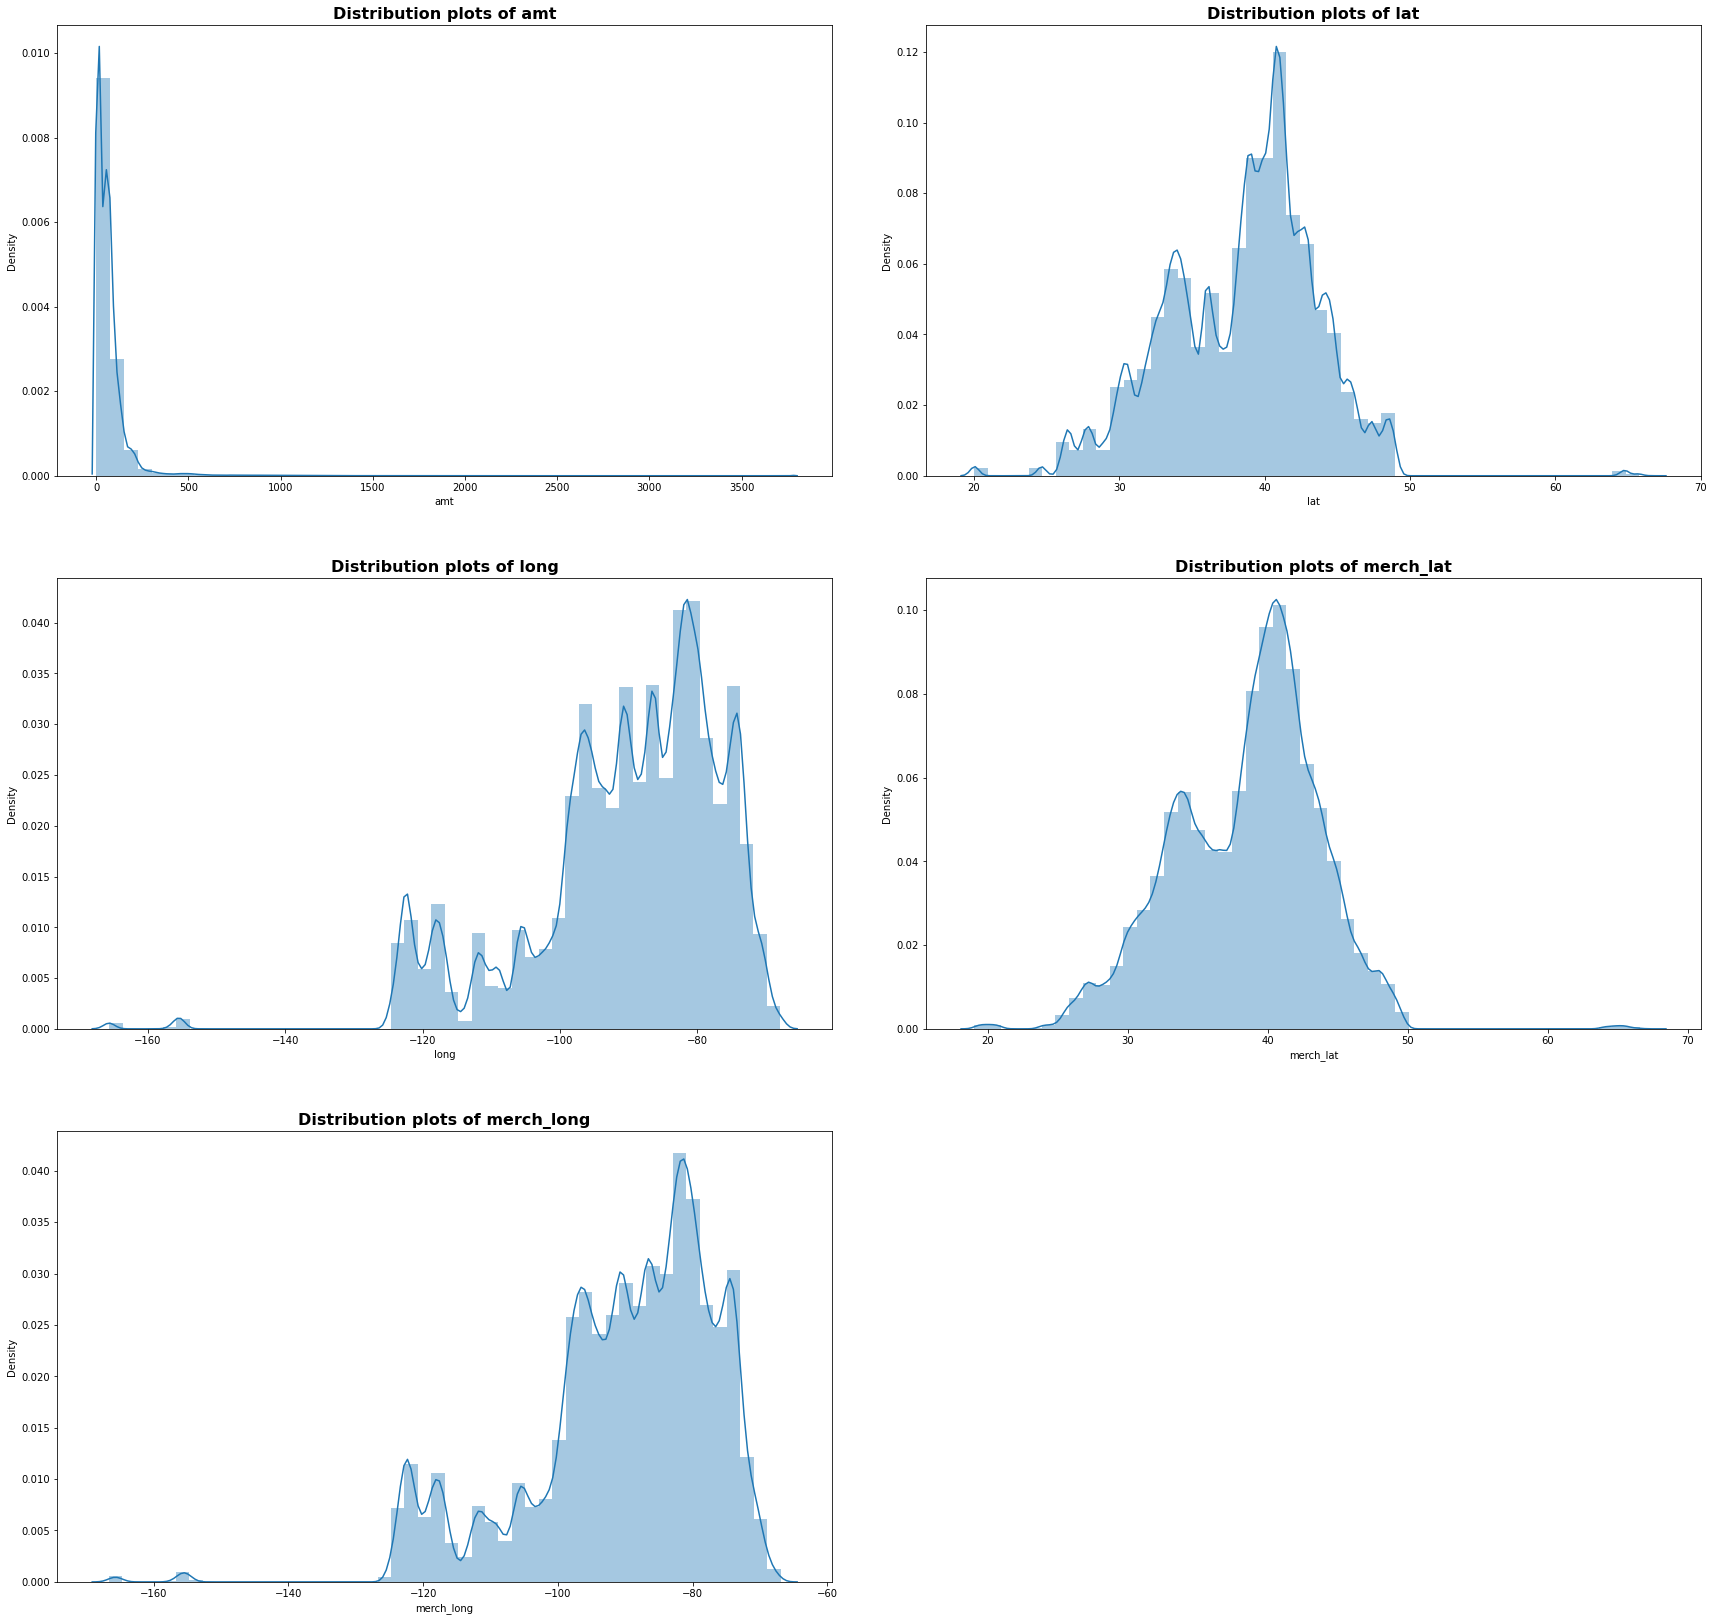

In [81]:
# # Check the skewness 
plt.figure(figsize = (25,30))
for var in enumerate(numerical_vars):
    plt.subplot(4,2,var[0]+1)
    plt.title("Distribution plots of " + var[1], fontweight = 'bold', fontsize = 16)
    sns.distplot(X_train[var[1]])
    
    plt.tight_layout(pad=5.0)
    plt.subplots_adjust(top=1.0)

##### **Power Transformation- Handlling Skewness**

In [82]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson', standardize= True)



In [83]:
X_train[numerical_vars] = pt.fit_transform(X_train[numerical_vars])
X_test[numerical_vars]= pt.transform(X_test[numerical_vars])


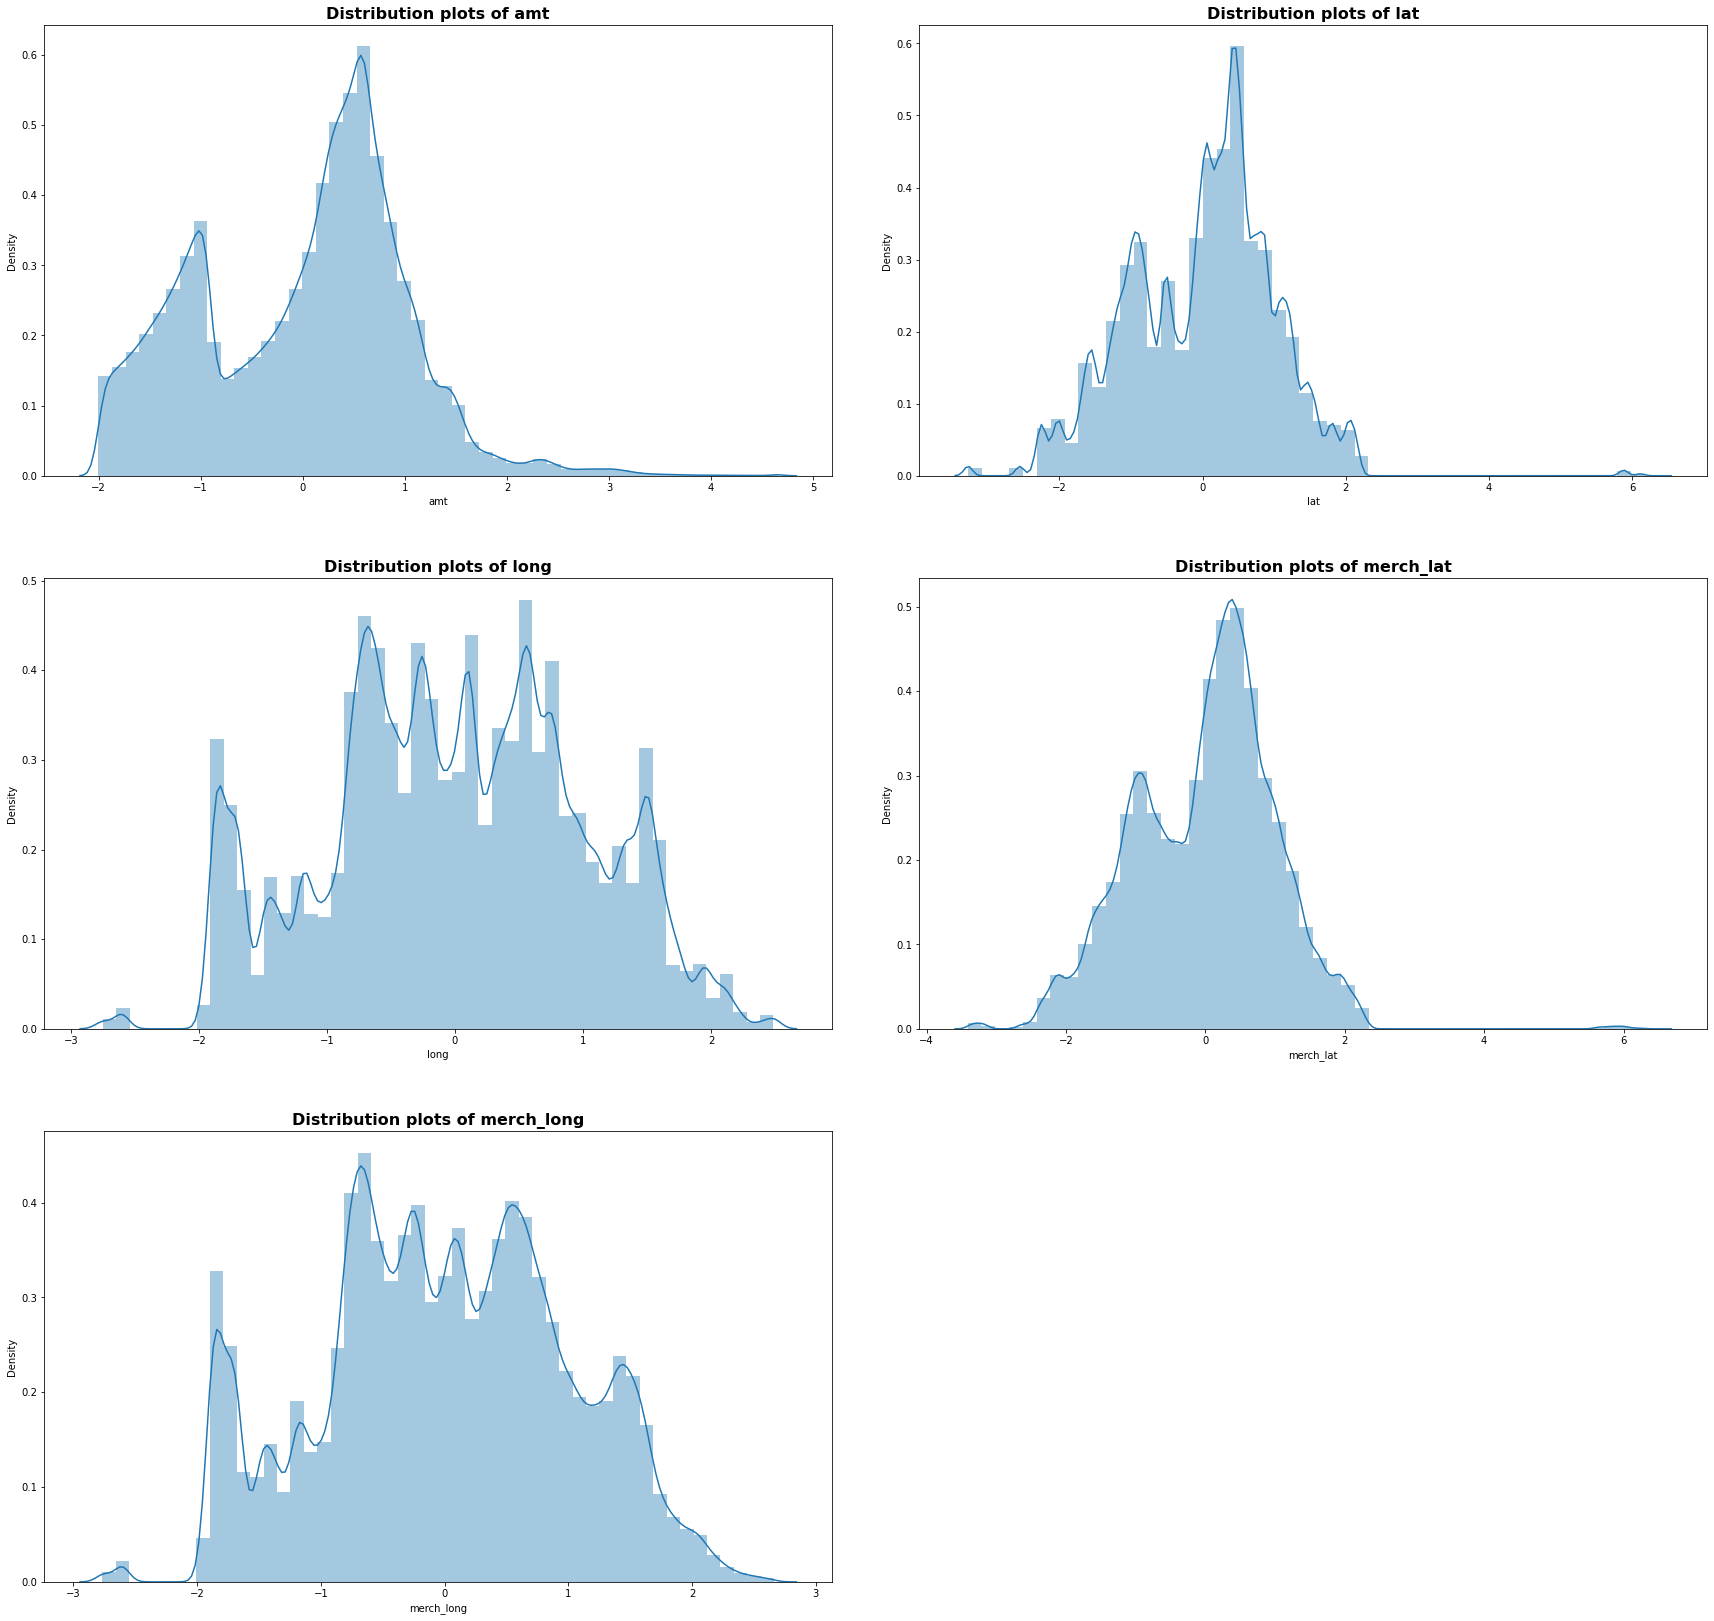

In [84]:
# # Check the skewness 
plt.figure(figsize = (25,30))
for var in enumerate(numerical_vars):
    plt.subplot(4,2,var[0]+1)
    plt.title("Distribution plots of " + var[1], fontweight = 'bold', fontsize = 16)
    sns.distplot(X_train[var[1]])
    
    plt.tight_layout(pad=5.0)
    plt.subplots_adjust(top=1.0)

The data is now split into two and its skeweness has been handled using <b>Power Transformation</b>

The data is **highly imbalanced** and needs to be Balanced. <br>This will be done using **Class of Weight** method. There are other methods like **SMOTE, ADASYN,Oversampling or Undersampling** but these change the data,making it more difficult and slower to deal with them in some case. 

Class weights directly modify the loss function by giving more (or less) penalty to the classes with more (or less) weight. In effect, one is basically sacrificing some ability to predict the lower weight class (the majority class for unbalanced datasets) by purposely biasing the model to favor more accurate predictions of the higher weighted class (the minority class)

### **5. Model Building**

The following models will be attempted to come up with a decent model to predict frauds. 

1. Baseline Linear Model- Logistic Regression
2. Decision Trees- With and Without Hyperparameter tuning
3. Random Forests- With and Without Hyperparamter Tuning



Let's begin with the first baseline model. The primary goal is to develop a model with a good recall value, that saves the cost the most. An acceptable value of accuracy will be also be attempted to achieve.It is of utmost importance that the model predicts fraudulent transaction correctly, hence the recall value is the most important metric to evaluate the model with an acceptable range of accurancy


#### **5.1 Logistic Regression- Model 1**

In [85]:
# Lets try With-out balancing the data, just to Know the Metrics.

# Weight of Class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("Recall/Sensitivity : ", metrics.recall_score(y_test, y_pred))

Accuracy :  0.9953141785686651
Recall/Sensitivity :  0.1689119170984456


In [86]:
# Handling the data imbalance with class_weight='balanced'

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
y_train_pred=logreg.predict(X_train)
y_test_pred=logreg.predict(X_test)
print("Train_set perfomance:","\n")
print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
print("AUC-ROC:",metrics.roc_auc_score(y_train,y_train_pred))
print("Precision Score:",metrics.precision_score(y_train,y_train_pred))
print("Recall Score/Sensitivity:",metrics.recall_score(y_train,y_train_pred))
print("F1 Score:",metrics.f1_score(y_train,y_train_pred),"\n")

print("Test Set Performance:","\n")
print("Confusion Matrix:","\n",confusion_matrix(y_test,y_test_pred),"\n")
print("Accuracy Score:",accuracy_score(y_test,y_test_pred))
print("AUC-ROC:",metrics.roc_auc_score(y_test,y_test_pred))
print("Precision Score:",metrics.precision_score(y_test,y_test_pred))
print("Recall Score/Sensitivity:",metrics.recall_score(y_test,y_test_pred))
print("F1 Score:",metrics.f1_score(y_test,y_test_pred))

Train_set perfomance: 

Accuracy Score: 0.8458865945591609
AUC-ROC: 0.8432502507554838
Precision Score: 0.02777872889936753
Recall Score/Sensitivity: 0.8405861456483126
F1 Score: 0.053780191578319356 

Test Set Performance: 

Confusion Matrix: 
 [[467545  85279]
 [   407   2488]] 

Accuracy Score: 0.845810562532503
AUC-ROC: 0.8525760558998348
Precision Score: 0.0283477844748026
Recall Score/Sensitivity: 0.859412780656304
F1 Score: 0.05488517791356908


The Metrics of **Logistic Regression** model seems fine but let's try with other better models.

#### **5.2 Decision Trees- Model 2**

###### **5.2.1 Creating Handling Functions to create the tree and evaluate models**

In [87]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [88]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz



In [89]:
# Function to create the tree

def get_dt_graph(dt_classifier):
        dot_data=StringIO()
        export_graphviz(dt_classifier,out_file=dot_data,filled=True,
                rounded=True,feature_names=X.columns,
               class_names=['Fraud','No Fraud'])
        graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
        return graph

In [90]:
# Function for model evaluation
def model_evaluator(dt_classifier):
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    print("Train_set perfomance:","\n")
    print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
    print("AUC-ROC:",metrics.roc_auc_score(y_train,y_train_pred))
    print("Precision Score:",metrics.precision_score(y_train,y_train_pred))
    print("Recall Score/Sensitivity:",metrics.recall_score(y_train,y_train_pred))
    print("F1 Score:",metrics.f1_score(y_train,y_train_pred),"\n")

    print("Test Set Performance:","\n")
    print("Confusion Matrix:","\n",confusion_matrix(y_test,y_test_pred),"\n")

    print("Accuracy Score:",accuracy_score(y_test,y_test_pred))
    print("AUC-ROC:",metrics.roc_auc_score(y_test,y_test_pred))
    print("Precision Score:",metrics.precision_score(y_test,y_test_pred))
    print("Recall Score/Sensitivity:",metrics.recall_score(y_test,y_test_pred))
    print("F1 Score:",metrics.f1_score(y_test,y_test_pred))

##### **5.2.12 Model Development**

In [91]:
#Instantiating the Decision Tree object

dt = DecisionTreeClassifier(max_depth=3,random_state=42,class_weight='balanced')

In [92]:
# Training the Train data using the .fit method
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

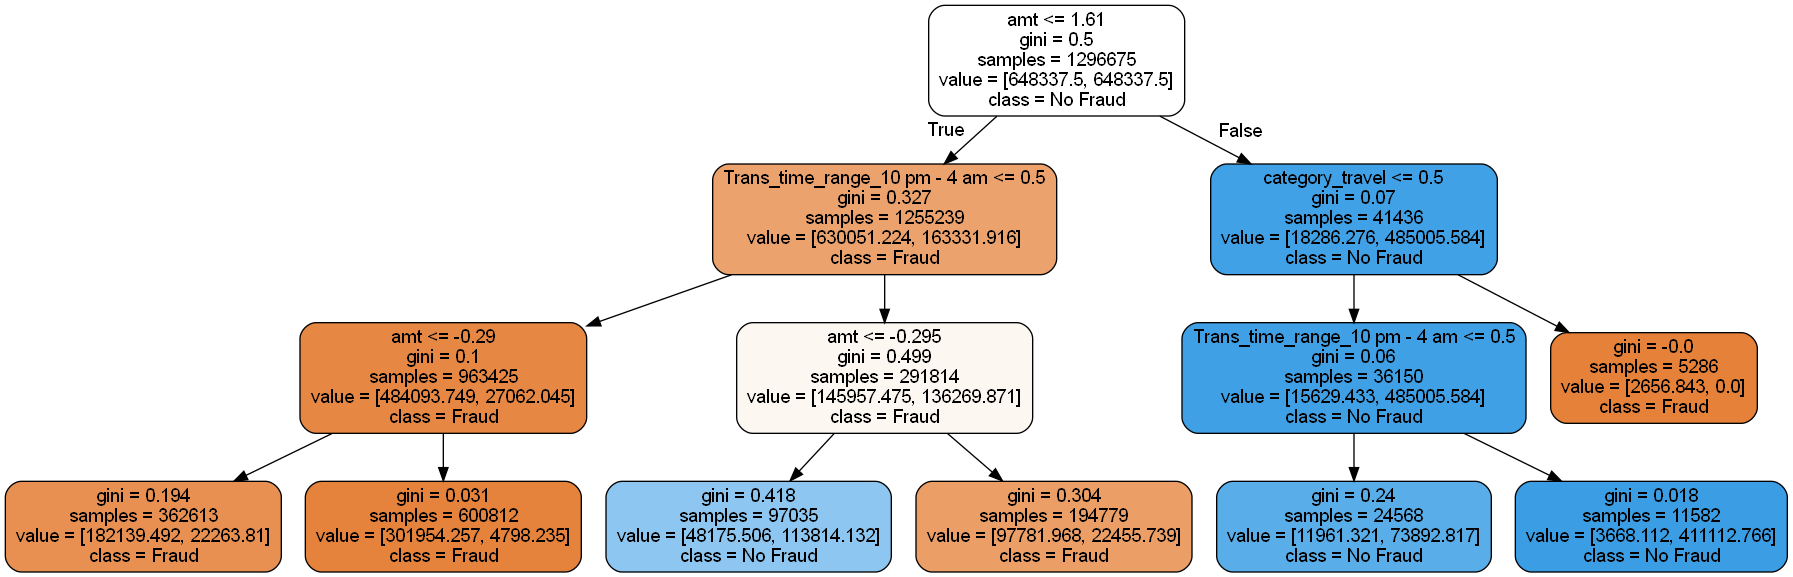

<Figure size 720x720 with 0 Axes>

In [93]:
plt.figure(figsize=(10,10))
graph=get_dt_graph(dt)
Image(graph.create_png())

##### **5.2.11 Model Evaluation**

In [94]:
model_evaluator(dt)

Train_set perfomance: 

Accuracy Score: 0.9017016600150385
AUC-ROC: 0.9126051448255049
Precision Score: 0.04685212298682284
Recall Score/Sensitivity: 0.9236234458259325
F1 Score: 0.08918044032842412 

Test Set Performance: 

Confusion Matrix: 
 [[498054  54770]
 [   199   2696]] 

Accuracy Score: 0.9010849008221781
AUC-ROC: 0.9160938358716959
Precision Score: 0.04691469738628058
Recall Score/Sensitivity: 0.9312607944732297
F1 Score: 0.0893292026308378


This model has a decent Recall value and accuracy score on the test data set.

#### **5.2.2 Decision Tree with HyperParameter Tuning**

##### **5.2.21 Decision Tree-Tuned Model 1**

In [95]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_k=StratifiedKFold(n_splits=2,random_state=100,shuffle = True)

#Instantiating the Decision Tree Classfier

dtc = DecisionTreeClassifier()

# Defining parameters for random search

params={
        'max_depth':[10,15,20],
        'min_samples_leaf':[10,30,50,60,100],
        'min_samples_split':[10,20,50,70],
        'criterion':['gini'],
        'class_weight':['balanced']
}

In [96]:
#Instantiating random search CV to with the parameters defined above

from sklearn.model_selection import RandomizedSearchCV
rand_search=RandomizedSearchCV(estimator=dtc,param_distributions=params,cv=strat_k,random_state=100,verbose=True)

#Fitting RandomizedSearchCV on X_train and Y_Train

rand_search.fit(X_train,y_train)



Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini'],
                                        'max_depth': [10, 15, 20],
                                        'min_samples_leaf': [10, 30, 50, 60,
                                                             100],
                                        'min_samples_split': [10, 20, 50, 70]},
                   random_state=100, verbose=True)

In [97]:
tuned_dt=rand_search.best_estimator_
tuned_dt

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=30, min_samples_split=20)

In [98]:
plt.figure(figsize=(10,10))
gph=get_dt_graph(tuned_dt)
Image(gph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.641572 to fit



<Figure size 720x720 with 0 Axes>

###### **5.2.22 Tuned Model Evaluation**

In [99]:
import sklearn.metrics as metrics
model_evaluator(tuned_dt)

Train_set perfomance: 

Accuracy Score: 0.9835008772437195
AUC-ROC: 0.9917072312292478
Precision Score: 0.24
Recall Score/Sensitivity: 1.0
F1 Score: 0.3870967741935484 

Test Set Performance: 

Confusion Matrix: 
 [[543508   9316]
 [   169   2726]] 

Accuracy Score: 0.9829320213993044
AUC-ROC: 0.9623859162752144
Precision Score: 0.22637435641919948
Recall Score/Sensitivity: 0.9416234887737478
F1 Score: 0.36499966526076183


The tree has outgrown immensely making it difficult to interpret. The Recall value is lower when compared to the previous model in 5.2.12

#### **5.3 Random Forests- Model 3**

In [100]:
X_train.head()

amt       lat      long  merch_lat  merch_long  \
148639  -1.260911  1.182900 -0.459131   1.037568   -0.482357   
371300   0.901534 -0.451894 -0.767689  -0.368121   -0.767020   
1057490  0.332641 -0.705400 -0.132477  -0.841378   -0.187621   
558949  -1.893521 -0.030680 -0.494296  -0.225687   -0.531125   
1128948  0.391228  0.374813  0.826563   0.175449    0.847875   

         category_food_dining  category_gas_transport  category_grocery_net  \
148639                      0                       0                     0   
371300                      0                       0                     0   
1057490                     0                       0                     1   
558949                      0                       0                     0   
1128948                     1                       0                     0   

         category_grocery_pos  category_health_fitness  category_home  \
148639                      0                        0              0   
371300                      0                        0              0   
1057490                     0                        0              0   
558949                      0                        0              0   
1128948                     0                        0              0   

         category_kids_pets  category_misc_net  category_misc_pos  \
148639                    0                  0                  0   
371300                    0                  1                  0   
1057490                   0                  0                  0   
558949                    0                  0                  0   
1128948                   0                  0                  0   

         category_personal_care  category_shopping_net  category_shopping_pos  \
148639                        0                      1                      0   
371300                        0                      0                      0   
1057490                       0                      0                      0   
558949                        0                      0                      1   
1128948                       0                      0                      0   

         category_travel  Trans_time_range_10 pm - 4 am  \
148639                 0                              0   
371300                 0                              0   
1057490                0                              0   
558949                 0                              0   
1128948                0                              0   

         Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
148639                               0                              0   
371300                               1                              0   
1057490                              1                              0   
558949                               1                              0   
1128948                              0                              1   

         City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
148639                     1                       0                        0   
371300                     0                       1                        0   
1057490                    0                       1                        1   
558949                     1                       0                        0   
1128948                    0                       1                        1   

         Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
148639                            0                              1   
371300                            0                              0   
1057490                           0                              0   
558949                            1                              0   
1128948                           0                              0   

         City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
148639                   0             

In [101]:
y_train.value_counts()

0    1289919
1       6756
Name: is_fraud, dtype: int64

In [102]:
rf=RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10,class_weight='balanced',oob_score=True)

In [103]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10,
                       oob_score=True, random_state=42)

In [104]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [105]:
model_evaluator(rf)

Train_set perfomance: 

Accuracy Score: 0.7714747334528699
AUC-ROC: 0.8475187506334905
Precision Score: 0.020674905729713266
Recall Score/Sensitivity: 0.9243635287152161
F1 Score: 0.04044518851214165 

Test Set Performance: 

Confusion Matrix: 
 [[425680 127144]
 [   199   2696]] 

Accuracy Score: 0.7708500159253148
AUC-ROC: 0.8506353897839718
Precision Score: 0.020764017252002463
Recall Score/Sensitivity: 0.9312607944732297
F1 Score: 0.04062229253776321


In [106]:
rf.oob_score_

0.806742630188752

**Conclusion:** The recall value is good but the accuracy score is low. We will try to fine tune this model to achieve better results.

#### **5.3.1 Random Forests- HyperParameter Tuned Model**

##### **5.3.11 Model I**

In [107]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_rf1=StratifiedKFold(n_splits=3,random_state=100,shuffle = True)

#Instantiating the Random Forest Classfier

rf1 = RandomForestClassifier(random_state=100,n_jobs=-1,verbose=1)

# Defining parameters for random search

params={
        'max_depth':[10,15,20],
        'min_samples_leaf':[10,15,20,30],
        'min_samples_split':[10,20,50],
        'max_features':[5,10],
        'n_estimators':[10,50],
        'class_weight':['balanced'],
        'oob_score':['True']
}

In [108]:

#Instatiating RandomSearch CV with the parameters above
random_search_1=RandomizedSearchCV(estimator=rf1,param_distributions=params,verbose=1,n_jobs=-1,cv=strat_rf1,n_iter=10)

In [109]:
#Fitting Random Search on X& Y trains
random_search_1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.8s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=100,
                                                    verbose=1),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [10, 15, 20],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': [10, 15, 20, 30],
                                        'min_samples_split': [10, 20, 50],
                                        'n_estimators': [10, 50],
                                        'oob_score': ['True']},
                   verbose=1)

In [110]:
# Finding best estimators.
random_search_1.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=5,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=10, n_jobs=-1, oob_score='True',
                       random_state=100, verbose=1)

###### **5.3.11.1 Model Evaluation-I**

In [111]:
model_evaluator(random_search_1)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.5s finished


Train_set perfomance: 

Accuracy Score: 0.9892347735554399
AUC-ROC: 0.981631957622046
Precision Score: 0.3231350979718116
Recall Score/Sensitivity: 0.9739490822972173
F1 Score: 0.4852686308492201 

Test Set Performance: 

Confusion Matrix: 
 [[546751   6073]
 [   399   2496]] 

Accuracy Score: 0.9883538263043012
AUC-ROC: 0.9255953763620409
Precision Score: 0.2912825300501809
Recall Score/Sensitivity: 0.8621761658031089
F1 Score: 0.435450104675506


As we see from the above metrics F1 Score is too Low when compare to other Models

##### **5.3.12 Model II**

In [112]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_rf2=StratifiedKFold(n_splits=3,random_state=100,shuffle = True)

#Instantiating the Random Forest Classfier

rf2 = RandomForestClassifier(random_state=100,n_jobs=-1,verbose=1)

# Defining parameters for random search

params={
        'max_depth':[5,15,20],
        'min_samples_leaf':[10,15,20],
        'min_samples_split':[20,50,70,100],
        'max_features':[4,8,10],
        'n_estimators':[1, 2, 4, 8, 16,20,32, 64, 100, 200],
        'class_weight':['balanced'],
        'oob_score':['True']
}

In [113]:
#Instatiating RandomSearch CV with the parameters above
random_search_2=RandomizedSearchCV(estimator=rf2,param_distributions=params,verbose=1,n_jobs=2,cv=strat_rf2,n_iter=10)

In [114]:
#Fitting Random Search on X& Y trains
random_search_2.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    5.4s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.8s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=100,
                                                    verbose=1),
                   n_jobs=2,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [5, 15, 20],
                                        'max_features': [4, 8, 10],
                                        'min_samples_leaf': [10, 15, 20],
                                        'min_samples_split': [20, 50, 70, 100],
                                        'n_estimators': [1, 2, 4, 8, 16, 20, 32,
                                                         64, 100, 200],
                                        'oob_score': ['True']},
                   verbose=1)

In [115]:
# Finding best estimators.
random_search_2.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=4,
                       min_samples_leaf=15, min_samples_split=20,
                       n_estimators=4, n_jobs=-1, oob_score='True',
                       random_state=100, verbose=1)

###### **5.3.12.1 Model Evaluation-II**

In [116]:
model_evaluator(random_search_2)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


Train_set perfomance: 

Accuracy Score: 0.9864368480922359
AUC-ROC: 0.9675629129270358
Precision Score: 0.27098574872076797
Recall Score/Sensitivity: 0.9484902309058615
F1 Score: 0.4215373482879979 

Test Set Performance: 

Confusion Matrix: 
 [[545415   7409]
 [   491   2404]] 

Accuracy Score: 0.9857841822935692
AUC-ROC: 0.9084975705960392
Precision Score: 0.2449811474574544
Recall Score/Sensitivity: 0.8303972366148532
F1 Score: 0.3783443500157381


This model does not seem to have a good <b>F1 Score</b>. It means that the model is not making correct predictions on fraud correctly. Therefore, we cannot use this model for deployment

##### **5.3.13 Model III**

In [117]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_rf3=StratifiedKFold(n_splits=3,random_state=100,shuffle = True)

#Instantiating the Random Forest Classfier

rf3 = RandomForestClassifier(random_state=100,n_jobs=2,verbose=1)

# Defining parameters for random search

params={
        'max_depth':[12,18],
        'min_samples_leaf':[20,50],
        'min_samples_split':[30,40],
        'max_features':[12,13,15],
        'class_weight':['balanced'],
        'oob_score':['True']
}

In [118]:
#Instatiating RandomSearch CV with the parameters above
random_search_3=RandomizedSearchCV(estimator=rf3,param_distributions=params,verbose=1,n_jobs=2,cv=strat_rf3,n_iter=10)

In [119]:
#Fitting Random Search on X& Y trains
random_search_3.fit(X_train,y_train) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  7.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=2, random_state=100,
                                                    verbose=1),
                   n_jobs=2,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [12, 18],
                                        'max_features': [12, 13, 15],
                                        'min_samples_leaf': [20, 50],
                                        'min_samples_split': [30, 40],
                                        'oob_score': ['True']},
                   verbose=1)

In [120]:
# Finding best estimators.
random_search_3.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=18, max_features=15,
                       min_samples_leaf=20, min_samples_split=30, n_jobs=2,
                       oob_score='True', random_state=100, verbose=1)

###### **5.3.13.1 Model Evaluation-III**

In [121]:
model_evaluator(random_search_3)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   14.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.8s finished


Train_set perfomance: 

Accuracy Score: 0.989839396919043
AUC-ROC: 0.992021884146368
Precision Score: 0.3383367752984436
Recall Score/Sensitivity: 0.9942273534635879
F1 Score: 0.5048667743996392 

Test Set Performance: 

Confusion Matrix: 
 [[547141   5683]
 [   225   2670]] 

Accuracy Score: 0.9893687277203047
AUC-ROC: 0.9559999241576682
Precision Score: 0.3196456362983359
Recall Score/Sensitivity: 0.9222797927461139
F1 Score: 0.47475106685632995


This model seems to be performing well within acceptable ranges of Recall and accuracy. This can be tested further for cost benefit analysis

**Summary**

It is observed that the Decision Tree- Model ( 5.1.12) and the Random Forest- Model III(5.3.13) do better with a decent Recall Score and Accuracy compared to all other models developed. We will do a cost benefit analysis on the both of them to finalise a model.

In the following section, we will work with credit_final_hist which is a copy of the credit_final data with dummy variables. The agenda is to derive a historical variable on amount. credit_final_hist will again go through similar processes as above, including train_test_Split() to build a Decision Tree in an attempt to achieve better performance.

### **5.4 Working with historical variables**

In [122]:
# Let us look at the data once again
credit_final_hist.head()

cc_num     amt      lat      long  \
0  2703186189652095    4.97  36.0788  -81.1781   
1      630423337322  107.23  48.8878 -118.2105   
2    38859492057661  220.11  42.1808 -112.2620   
3  3534093764340240   45.00  46.2306 -112.1138   
4   375534208663984   41.96  38.4207  -79.4629   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   

  Transaction_date  category_food_dining  category_gas_transport  \
0       2019-01-01                     0                       0   
1       2019-01-01                     0                       0   
2       2019-01-01                     0                       0   
3       2019-01-01                     0                       1   
4       2019-01-01                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     1                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  1                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  0   
4              0                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4           

In [123]:
# Converting Transaction date to index
credit_final_hist.index=pd.to_datetime(credit_final_hist['Transaction_date'])

In [124]:
credit_final_hist.head(2)

cc_num     amt      lat      long  \
Transaction_date                                                
2019-01-01        2703186189652095    4.97  36.0788  -81.1781   
2019-01-01            630423337322  107.23  48.8878 -118.2105   

                                         trans_num  merch_lat  merch_long  \
Transaction_date                                                            
2019-01-01        0b242abb623afc578575680df30655b9  36.011293  -82.048315   
2019-01-01        1f76529f8574734946361c461b024d99  49.159047 -118.186462   

                  is_fraud Transaction_date  category_food_dining  \
Transaction_date                                                    
2019-01-01               0       2019-01-01                     0   
2019-01-01               0       2019-01-01                     0   

                  category_gas_transport  category_grocery_net  \
Transaction_date                                                 
2019-01-01                             0                     0   
2019-01-01                             0                     0   

                  category_grocery_pos  category_health_fitness  \
Transaction_date                                                  
2019-01-01                           0                        0   
2019-01-01                           1                        0   

                  category_home  category_kids_pets  category_misc_net  \
Transaction_date                                                         
2019-01-01                    0                   0                  1   
2019-01-01                    0                   0                  0   

                  category_misc_pos  category_personal_care  \
Transaction_date                                              
2019-01-01                        0                       0   
2019-01-01                        0                       0   

                  category_shopping_net  category_shopping_pos  \
Transaction_date                                                 
2019-01-01                            0                      0   
2019-01-01                            0                      0   

                  category_travel  Trans_time_range_10 pm - 4 am  \
Transaction_date                                                   
2019-01-01                      0                              1   
2019-01-01                      0                              1   

                  Trans_time_range_4 am - 10 am  \
Transaction_date                                  
2019-01-01                                    0   
2019-01-01                                    0   

                  Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  \
Transaction_date                                                       
2019-01-01                                    0                    0   
2019-01-01                                    0                    0   

                  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
Transaction_date                                                    
2019-01-01                             1                        0   
2019-01-01                             1                        0   

                  Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
Transaction_date                                                              
2019-01-01                                 0                              0   
2019-01-01                                 0                              0   

                  City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
Transaction_date                                                                
2019-01-01                        0                     1                   0   
2019-01-01                        0                     0                   0   

                  City_Pop_Bins_Very High  category_food_dining  \
Transaction_date                                                  
2019-01-01  

In [125]:
# Convert datatype of cc_num to int groupby on it.
credit_final_hist[['cc_num']] = credit_final_hist['cc_num'].astype(int)


In [126]:
# Deriving the historical variable 'Average Amount_60days' which will give the information about the general 
#transactions amount over last 60 days as on current date from the previous day.

credit_hist_group=credit_final_hist.groupby(['cc_num'])['amt'].rolling('60D').mean().shift().reset_index().fillna(0)
credit_hist_group.tail()

cc_num Transaction_date        amt
1852389  2145616331       2020-12-31  91.137394
1852390  2145616331       2020-12-31  91.093321
1852391  2145616331       2020-12-31  91.018140
1852392  2145616331       2020-12-31  90.899118
1852393  2145616331       2020-12-31  90.745321

In [127]:
# Rename the feature, 'amt' in the dataframe above and saving it in another for merging with the original, credit_final_hist
chg_tidy = credit_hist_group.rename(columns = {'amt': 'Average_Amount_60d'}, inplace = False)
chg_tidy.head()

cc_num Transaction_date  Average_Amount_60d
0 -2144974187       2019-01-01              0.0000
1 -2144974187       2019-01-06            158.4900
2 -2144974187       2019-01-07            107.7000
3 -2144974187       2019-01-07             86.3400
4 -2144974187       2019-01-07             89.1875

In [128]:
#The index is dropped for merging. We cannot merge on a datetime index.
credit_final_hist.reset_index(drop=True, inplace=True)

In [129]:
chg_tidy.shape

(1852394, 3)

In [130]:
# Merging dataframes with historical variable, Average_amt_60D with original, credit_final_hist
credit_final_hist_new=pd.merge(credit_final_hist,chg_tidy,how='inner',on=['cc_num','Transaction_date'])
credit_final_hist_new.head(2)

cc_num   amt      lat     long                         trans_num  \
0 -1801940865  4.97  36.0788 -81.1781  0b242abb623afc578575680df30655b9   
1 -1801940865  4.97  36.0788 -81.1781  0b242abb623afc578575680df30655b9   

   merch_lat  merch_long  is_fraud Transaction_date  category_food_dining  \
0  36.011293  -82.048315         0       2019-01-01                     0   
1  36.011293  -82.048315         0       2019-01-01                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  1                  0                       0   

   category_shopping_net  category_shopping_pos  category_travel  \
0                      0                      0                0   
1                      0                      0                0   

   Trans_time_range_10 pm - 4 am  Trans_time_range_4 am - 10 am  \
0                              1                              0   
1                              1                              0   

   Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  City_Fraud_Risk_Medium  \
0                              0                    0                       1   
1                              0                    0                       1   

   Merchant_Fraud_Risk_Low  Merchant_Fraud_Risk_Medium  \
0                        0                           0   
1                        0                           0   

   Merchant_Fraud_Risk_Very High  City_Pop_Bins_Low  City_Pop_Bins_Medium  \
0                              0                  0                     1   
1                              0                  0                     1   

   City_Pop_Bins_High  City_Pop_Bins_Very High  category_food_dining  \
0                   0                        0                     0   
1                   0                        0                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  1                  0                       0   

   category_shopping_net  category_shopping_pos  category_travel  \
0                      0                      0                0   
1                      0                      0                0   

   Trans_time_range_10 pm - 4 am  Trans_time_range_4 am - 10 am  \
0                              1                              0   
1                              1                              0   

   Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  City_Fraud_Risk_Medium  \
0                              0                    0                       1   
1                              0                    0                       1   

   Merchant_Fraud_Risk_Low  Merchant_Fraud_Risk_Medium  \
0                        0                           0   
1                        0                           0   

   Merchant_Fraud_Risk_Very High  City_Pop_Bins_Low  City_Pop_Bins_Medium  \
0                              0                  0                     1   
1                              0                  0       

In [131]:
# Drop trans_num

credit_final_hist_new.drop('trans_num',inplace=True,axis=1)
credit_final_hist_new.drop('Transaction_date',inplace=True,axis=1)

##### **5.4.1 Train_Test Split- Historical**


The operation that follows includes the historical variable just created. The purpose is to compare the model chosen from the above operations with the one that follows. We will use the Random Forest algorithm and build a model to compare Random Forest-Model-III(5.3.12).

In [132]:
X=credit_final_hist_new.drop('is_fraud',axis=1)
y=credit_final_hist_new['is_fraud']


In [133]:
from sklearn.model_selection import train_test_split

# **Performing Stratified train-test split**

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0, stratify = y)

In [134]:
print("The shape of the train dataset is ",X_train.shape)
print("The shape of the test dataset is ",X_test.shape)

The shape of the train dataset is  (6787179, 57)
The shape of the test dataset is  (2908791, 57)


In [135]:
X_train.head(2)

cc_num    amt      lat     long  merch_lat  merch_long  \
6901314 -1845340162   1.27  42.9147 -83.4845  43.020016  -83.201219   
2237315   598029435  68.86  41.4798 -79.9403  40.503538  -80.629764   

         category_food_dining  category_gas_transport  category_grocery_net  \
6901314                     0                       0                     0   
2237315                     0                       1                     0   

         category_grocery_pos  category_health_fitness  category_home  \
6901314                     0                        0              0   
2237315                     0                        0              0   

         category_kids_pets  category_misc_net  category_misc_pos  \
6901314                   0                  0                  0   
2237315                   0                  0                  0   

         category_personal_care  category_shopping_net  category_shopping_pos  \
6901314                       0                      1                      0   
2237315                       0                      0                      0   

         category_travel  Trans_time_range_10 pm - 4 am  \
6901314                0                              0   
2237315                0                              0   

         Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
6901314                              0                              1   
2237315                              1                              0   

         City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
6901314                    1                       0                        0   
2237315                    0                       0                        0   

         Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
6901314                           0                              0   
2237315                           0                              0   

         City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
6901314                  0                     0                   0   
2237315                  1                     0                   0   

         City_Pop_Bins_Very High  category_food_dining  \
6901314                        0                     0   
2237315                        0                     0   

         category_gas_transport  category_grocery_net  category_grocery_pos  \
6901314                       0                     0                     0   
2237315                       1                     0                     0   

         category_health_fitness  category_home  category_kids_pets  \
6901314                        0              0                   0   
2237315                        0              0                   0   

         category_misc_net  category_misc_pos  category_personal_care  \
6901314                  0                  0                       0   
2237315                  0                  0                       0   

         category_shopping_net  category_shopping_pos  category_travel  \
6901314                      1                      0                0   
2237315                      0                      0                0   

         Trans_time_range_10 pm - 4 am  Trans_time_range_4 am - 10 am  \
6901314                              0                              0   
2237315                              0                              1   

         Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  \
6901314                              1                    1   
2237315                              0                    0   

         City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
6901314                       0                        0   
2237315                       0                        0   

         Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
6901314                           0                              0   
2237315           

From the above operations without the historical variable, we know that the numerical values are skewed. Since, we have considered the copy of the data in which skewness was not handled, lets apply Power Transformation on the new datframe with average amount of transaction over the last 60 days.

In [136]:
# Power Transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson', standardize= True)


In [137]:
numvars=['amt','lat','long','merch_lat','merch_long','Average_Amount_60d']
X_train[numvars] = pt.fit_transform(X_train[numvars])
X_test[numvars]= pt.transform(X_test[numvars])

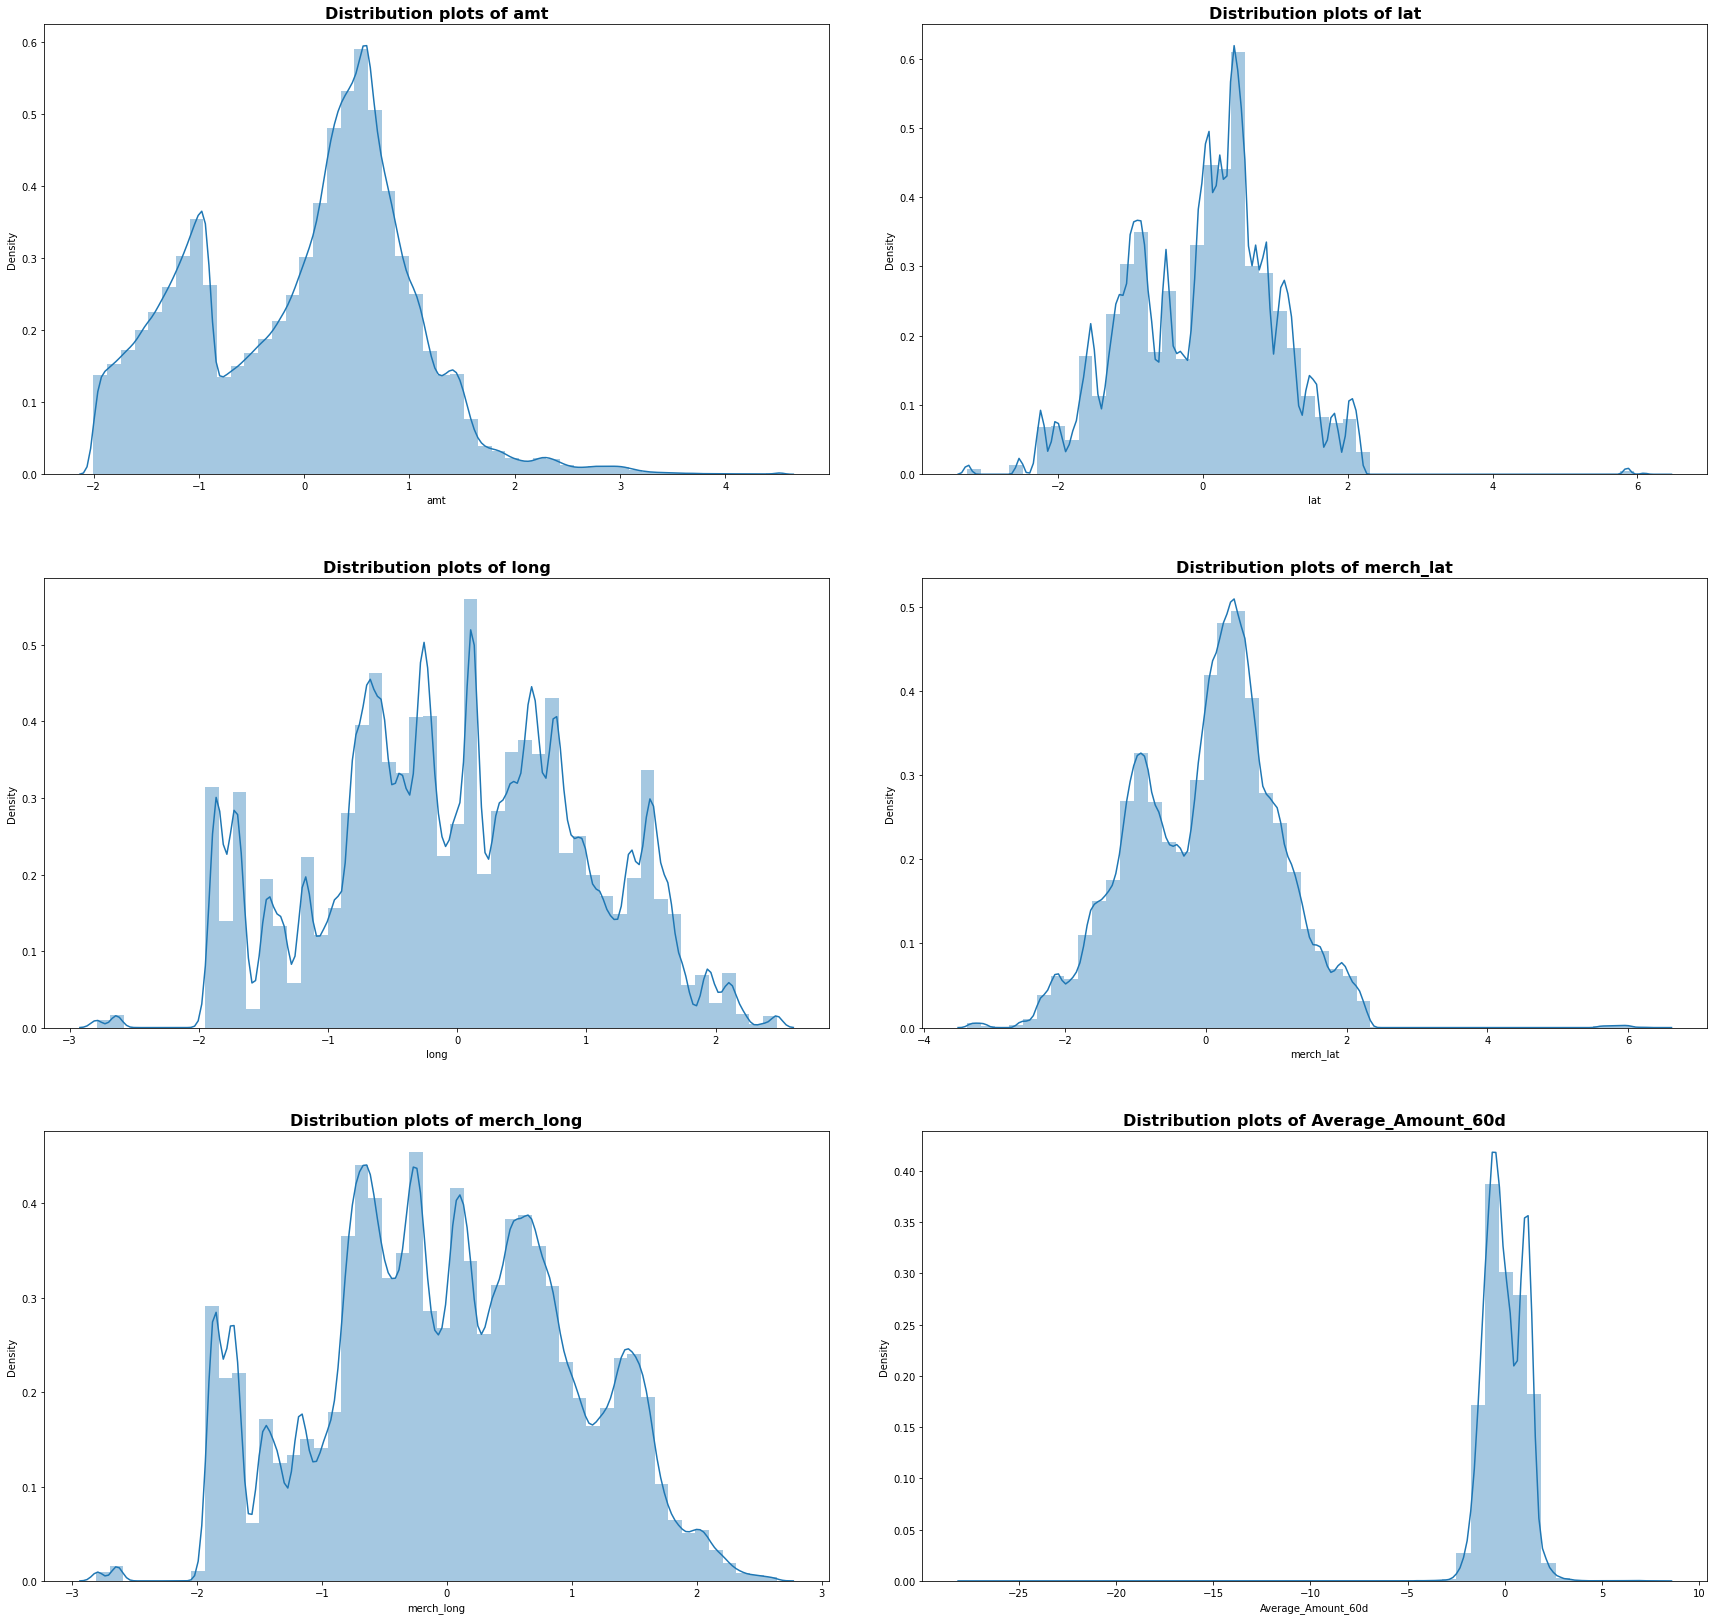

In [138]:
# # Check the skewness 
plt.figure(figsize = (25,30))
for var in enumerate(numvars):
    plt.subplot(4,2,var[0]+1)
    plt.title("Distribution plots of " + var[1], fontweight = 'bold', fontsize = 16)
    sns.distplot(X_train[var[1]])
    
    plt.tight_layout(pad=5.0)
    plt.subplots_adjust(top=1.0)

##### **5.4.2 Decision Tree with Historical Variable**

In [139]:
#Instantiating the Decision Tree object
dth = DecisionTreeClassifier(max_depth=3,random_state=42,class_weight='balanced')

In [140]:
dth.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [141]:
model_evaluator(dth)

Train_set perfomance: 

Accuracy Score: 0.8974650587526865
AUC-ROC: 0.9142504642152841
Precision Score: 0.05213796423301465
Recall Score/Sensitivity: 0.9312408402540303
F1 Score: 0.09874730144669654 

Test Set Performance: 

Confusion Matrix: 
 [[2594256  296989]
 [   1232   16314]] 

Accuracy Score: 0.8974759616624226
AUC-ROC: 0.9135322289087646
Precision Score: 0.052070998362607444
Recall Score/Sensitivity: 0.9297845662829135
F1 Score: 0.09861900746261891


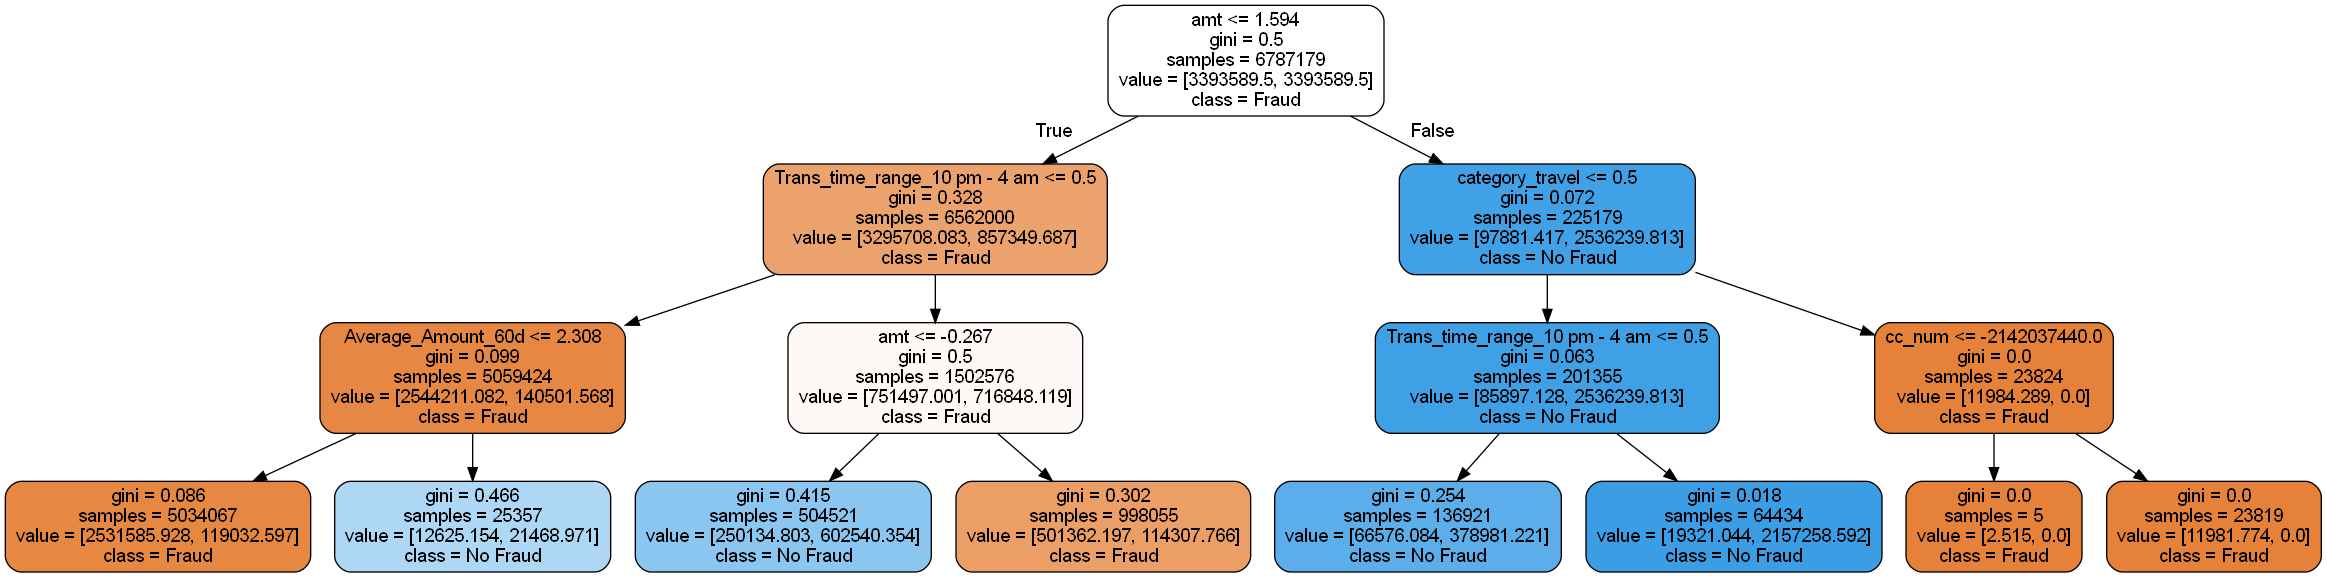

In [142]:
gph=get_dt_graph(dth)
Image(gph.create_png())

**Conclusion**: Addition of a historical variable has not improved the performance of the Decision tree any significantly.

#### **5.4.2.1 Decision Tree with Historical Variable- Hyperparameter Tuning**

In [143]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_k=StratifiedKFold(n_splits=3,random_state=100,shuffle = True)

#Instantiating the Decision Tree Classfier

dth1 = DecisionTreeClassifier()

# Defining parameters for random search

params={
        'max_depth':[5,6,8,12],
        'min_samples_leaf':[10,12,15],
    
        'min_samples_split':[200,300,500],
        'criterion':['gini'],
        'class_weight':['balanced']
}

In [144]:
#Instantiating random search CV to with the parameters defined above
from sklearn.model_selection import RandomizedSearchCV
rand_search_dth=RandomizedSearchCV(estimator=dth1,param_distributions=params,cv=strat_k,random_state=100,verbose=True)

#Fitting RandomizedSearchCV on X_train and Y_Train

rand_search_dth.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini'],
                                        'max_depth': [5, 6, 8, 12],
                                        'min_samples_leaf': [10, 12, 15],
                                        'min_samples_split': [200, 300, 500]},
                   random_state=100, verbose=True)

In [145]:
model_evaluator(rand_search_dth)


Train_set perfomance: 

Accuracy Score: 0.9683624080048574
AUC-ROC: 0.9807955703085228
Precision Score: 0.15940625881910256
Recall Score/Sensitivity: 0.993380556912555
F1 Score: 0.2747274274828755 

Test Set Performance: 

Confusion Matrix: 
 [[2799395   91850]
 [    170   17376]] 

Accuracy Score: 0.9683648636151583
AUC-ROC: 0.9792714303881325
Precision Score: 0.1590830022155897
Recall Score/Sensitivity: 0.9903111820357916
F1 Score: 0.2741299340548386


#### **6.Conclusion:** 

1. Of the 8 models developed, I have selected the  **5.4.2.1 Decision Tree with Historical Variable- Hyperparameter Tuning** as the best on the basis of its recall value,cost savings and accuracy score when compared to all others. On analysing the cost benefit of this model, a savings of a total of USD **322943.225**.This calculation is based on the dataset provided- credit_final.

2. The historical variables improved the performance of the Hyperparameter tuned Decision Tree. However, the dataset had increased number of rows which would not have given the right calculations of cost-benefit,which as per instruction should be based on the original dataset,credit_final.

**The chosen model is the 5.4.2.1 Decision Tree with Historical Variable- Hyperparameter Tuning**